# Predicting Airfare Prices

In [1]:
# Import Needed Libraries 
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score



In [2]:
#import data
df1 = pd.read_csv('pek-sha.csv')
df2 = pd.read_csv('sha-pek.csv')

In [3]:
#Check the head of the data
df1.head()

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1
1,14409,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1
2,14415,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1
3,14429,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1
4,14431,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1


In [4]:
# Check the shape of the data 
df2.shape

(268581, 14)

In [5]:
#Check the shape of the data
df1.shape

(300336, 14)

In [6]:
# put both dataframes together
df = pd.concat([df1,df2]).reset_index()
# I used concat because the 2 data frames have the same exact columns, so 1 dataframe gets stacked on top of another.
# the .reset_index() method is used so df1 does not keep its indexes, but instead the index continues on from the df obj. 

In [7]:
# Check the shape
df.shape
# we have the correct number of rows and columns

(568917, 15)

In [8]:
# check to see if the index is correct
df.tail()
# the real index is in bold (and it's correct), now we just have to drop the index column

,index,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
568912,268576,77617774,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,830,0.56,2019-07-14 23:28:01,7
568913,268577,77617775,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,880,0.60,2019-07-14 23:28:01,7
568914,268578,77617776,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,920,0.62,2019-07-14 23:28:01,7
568915,268579,77617777,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,790,0.54,2019-07-14 23:28:01,7
568916,268580,77617779,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,Y,1490,1.00,2019-07-14 23:28:01,7


In [9]:
# drop the index column, set inplace to True(so it saves the changes)
df.drop('index',axis=1,inplace=True)

In [10]:
# Check the columns to see if it worked 
df.columns

Index(['ID', 'flightNumber', 'craftTypeCode', 'depAirport', 'traAirport',
       'arrAirport', 'departureDate', 'arrivalDate', 'cabinClass',
       'priceClass', 'price', 'rate', 'createDate', 'dateDifference'],
      dtype='object')

In [11]:
# Inspect the data to see what info we are getting.
df.head()

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1
1,14409,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1
2,14415,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1
3,14429,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1
4,14431,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1


In [12]:
# check the data types of each column
df.dtypes

ID                  int64
flightNumber       object
craftTypeCode      object
depAirport         object
traAirport         object
arrAirport         object
departureDate      object
arrivalDate        object
cabinClass         object
priceClass         object
price               int64
rate              float64
createDate         object
dateDifference      int64
dtype: object

In [13]:
# make a copy of the final df and set it as the original. We will NOT touch this specific dataset (df_orig)
df_orig = df.copy()

In [14]:
df_orig.head()

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1
1,14409,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1
2,14415,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1
3,14429,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1
4,14431,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1


# Data Cleaning

### Next steps

In [15]:
# drop traAirport column
# convert cabinClass and priceClass to numerical
# Turn all date columns into datetime objects
# Get the coordinates of the airports
# Replace depAiport amd arrApt with numeric code
# get the distances of the flights 
# get day of the week (Mon) from depart date, arrival date, and create date
# the column 'rate' is the discount rate.The lower the rate the cheaper the ticket.
# New column should be:  Actaul paid = price * rate 
# Make flight_duration: arrival time - depart time
# Check if any flights are on holidays

In [16]:
# see total number of Na's in the data set
df.isna().sum()

ID                     0
flightNumber           0
craftTypeCode          0
depAirport             0
traAirport        558056
arrAirport             0
departureDate          0
arrivalDate            0
cabinClass             0
priceClass             0
price                  0
rate                   0
createDate             0
dateDifference         0
dtype: int64

In [17]:
# drop traAirport column because it's all na values
df.drop('traAirport',axis=1,inplace=True)
# set index=1 because we are dropping a column, inplace saves the change

In [18]:
# the column has been dropped from the data set
df.head()

,ID,flightNumber,craftTypeCode,depAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1
1,14409,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1
2,14415,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1
3,14429,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1
4,14431,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1


In [19]:
# check for duplicates 
df.duplicated().sum()

0

In [20]:
df['createDate'].nunique()

1249

# EDA

In [21]:
# figure out what 'price class' cloumn is 
# why does this flight route matter so much google search it
# find airline carrier

In [22]:
# convert cabinClass and priceClass to numerical values
# Y = Econ Class, C = Business Class , F = First Class
# make a dictionary of values and what you what to convert the values to
key = {'Y':0,'C':1,'F':2}
# make a list comphrehension and iterate through the series replacing all the letters with numbers
df['cabinClass'] = [key[letter] for letter in df.cabinClass]



In [23]:
# see the values counts and check for any in balances
df['cabinClass'].value_counts(True)
# we can see that most tickets sold are economy 
# There is a class inbalance (we will deal with this later)

0    0.645495
1    0.244909
2    0.109596
Name: cabinClass, dtype: float64

In [24]:
# turn all the columns with dates into datetime objs
df['departureDate'] = pd.to_datetime(df['departureDate'])
df['arrivalDate'] = pd.to_datetime(df['arrivalDate'])
df['createDate'] = pd.to_datetime(df['createDate'])

In [25]:
# check the data types
df.dtypes

ID                         int64
flightNumber              object
craftTypeCode             object
depAirport                object
arrAirport                object
departureDate     datetime64[ns]
arrivalDate       datetime64[ns]
cabinClass                 int64
priceClass                object
price                      int64
rate                     float64
createDate        datetime64[ns]
dateDifference             int64
dtype: object

In [26]:
#sns.pairplot(df)

In [27]:
df.columns

Index(['ID', 'flightNumber', 'craftTypeCode', 'depAirport', 'arrAirport',
       'departureDate', 'arrivalDate', 'cabinClass', 'priceClass', 'price',
       'rate', 'createDate', 'dateDifference'],
      dtype='object')

In [28]:
# see the total earnings of each group
cabin_earnings = df.groupby(df['cabinClass']).agg({'price':'sum'})
cabin_mean_earnings = df.groupby(df['cabinClass']).agg({'price':'mean'})

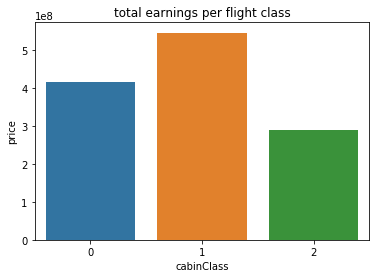

In [29]:
sns.barplot(x=cabin_earnings.index,y= cabin_earnings['price']);
plt.title('total earnings per flight class');


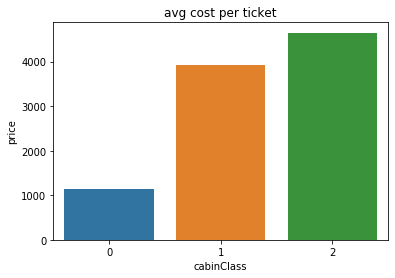

In [30]:
# avg cost of a ticket
sns.barplot(x=cabin_mean_earnings.index,y=cabin_mean_earnings['price']);
plt.title('avg cost per ticket');

In [31]:
df.head()
# make a plot that stacks actual price over price paid

,ID,flightNumber,craftTypeCode,depAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,1
1,14409,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,1
2,14415,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,1
3,14429,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,1
4,14431,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,1


In [32]:
# #check day of week with rate 
# mean_rate =df.groupby('departureDate_dofweek').agg({'rate':'mean'});
# sns.barplot(mean_rate.index, mean_rate['rate']);
# plt.title('Mean Rate Per day of Week');

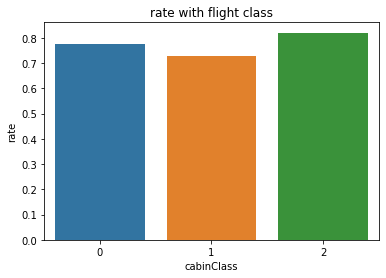

In [33]:
# check rate with flight class
class_rate = df.groupby('cabinClass').agg({'rate':'mean'});
sns.barplot(class_rate.index, class_rate['rate']);
plt.title('rate with flight class');

In [34]:
df_orig.head()

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1
1,14409,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1
2,14415,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1
3,14429,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1
4,14431,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1


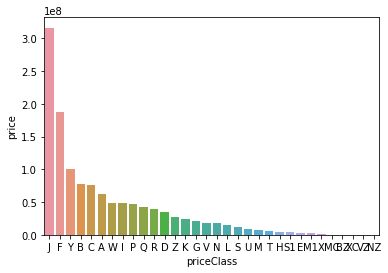

In [35]:
pcp = df_orig.groupby('priceClass').agg({'price':'sum'}).sort_values(by='price',ascending=False)
sns.barplot(x=pcp.index, y = pcp['price'])

In [36]:
# get day of week(Tues) for depDa, arDa, crDa
df['departureDate_dofweek'] = df['departureDate'].dt.dayofweek
df['arrivalDate_dofweek'] = df['arrivalDate'].dt.dayofweek
df['createDate_dofweek'] = df['createDate'].dt.dayofweek
# Note that 0 = Monday and 6 = Sunday. The comp starts off on Monday

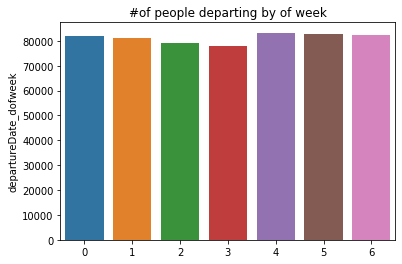

In [37]:
#see the number of flight departures by day of week
sns.barplot(x=df['departureDate_dofweek'].unique(),y=df['departureDate_dofweek'].value_counts());

plt.title('#of people departing by of week');

In [38]:
# # # group by depart Day of Week and cabin class. Get the mean price per day
mean_flp = df.groupby(['departureDate_dofweek','cabinClass']).agg({'price':'mean'}).sort_values('price', ascending=False)
# # # reset the index
mean_flp = mean_flp.reset_index()


In [39]:
mean_flp.head()

,departureDate_dofweek,cabinClass,price
0,4,2,4860.344748
1,3,2,4796.805445
2,2,2,4727.657046
3,1,2,4615.718278
4,6,2,4599.914722


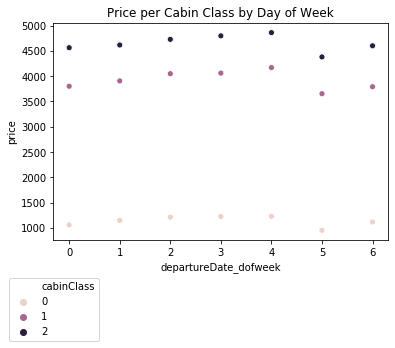

In [364]:
# # make a scatter plot of price by day for each cabin class
sns.scatterplot(x=mean_flp['departureDate_dofweek'],y= mean_flp['price'], hue=mean_flp['cabinClass'])
plt.title('Price per Cabin Class by Day of Week');
plt.legend(bbox_to_anchor=(.15, -.15));


In [41]:
df.head()

,ID,flightNumber,craftTypeCode,depAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek
0,14393,HO1252,320,PEK,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,1,4,4,3
1,14409,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,1,4,4,3
2,14415,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,1,4,4,3
3,14429,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,1,4,4,3
4,14431,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,1,4,4,3


In [42]:
# # groupby by date difference and see what we find
# # delete this cell later
# drpp = df.groupby(['dateDifference','rate','pricePaid','cabinClass']).agg({'price':'mean'}).reset_index()
# # do scatter plot for just bussiness class
# busi = drpp[drpp['cabinClass']==1]
# sns.scatterplot(x=busi['dateDifference'],y=busi['rate'])

In [43]:
# the differnt flight numbers
df['flightNumber'].unique()
# I will extract the airline from the first 2 letters
# heres the airline link  # https://en.wikipedia.org/wiki/List_of_airlines_of_China

array(['HO1252', 'MU5138', 'HU7605', 'CA1831', 'MU5102', 'HU7607',
       'MU5156', 'CZ3951', 'MU5104', 'MU5106', 'CA1531', 'MU5108',
       'CA1557', 'MU5152', 'MU5110', 'CA1517', 'MU5154', 'MU5114',
       'CA1521', 'MU5116', 'CA1515', 'HU7609', 'MU5118', 'CA1549',
       'MU5120', 'HU7601', 'CA1855', 'MU5122', 'FM9108', 'MU5124',
       'CA1857', 'MU5126', 'CA1589', 'FM9106', 'MU5128', 'HU7603',
       'MU5158', 'MU5160', 'MU5693', 'CA1501', 'CA1519', 'MU5112',
       'CA1885', 'MU7106', 'CZ3907', 'MF8178', 'FM9102', 'MU5390',
       'CA1583', 'MU7032', 'CZ6412', 'CA1550', 'MU5125', 'MU5159',
       'CA1856', 'HU7602', 'MU5331', 'FM9107', 'HO1251', 'MU5137',
       'CA1858', 'MU5101', 'HU7604', 'MU5151', 'CA1590', 'MU5103',
       'MF8177', 'MU5153', 'MU5105', 'CA1832', 'MU5107', 'HU7606',
       'CZ3908', 'CA1502', 'MU5109', 'HU7608', 'CA1520', 'MU5111',
       'FM9103', 'CA1532', 'MU5113', 'MU5155', 'CA1558', 'MU5115',
       'MU5117', 'CA1518', 'MU5119', 'MU5157', 'CA1522', 'MU51

In [44]:
df_orig.head()

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1
1,14409,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1
2,14415,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1
3,14429,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1
4,14431,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1


In [45]:
df_orig.dtypes

ID                  int64
flightNumber       object
craftTypeCode      object
depAirport         object
traAirport         object
arrAirport         object
departureDate      object
arrivalDate        object
cabinClass         object
priceClass         object
price               int64
rate              float64
createDate         object
dateDifference      int64
dtype: object

In [46]:
# change the columns into datetime objects
df_orig['departureDate'] = pd.to_datetime(df_orig['departureDate'])
df_orig['arrivalDate'] = pd.to_datetime(df_orig['arrivalDate'])
df_orig['createDate'] = pd.to_datetime(df_orig['createDate'])

In [47]:
# check to see if it worked.(it worked!)
df_orig.dtypes

ID                         int64
flightNumber              object
craftTypeCode             object
depAirport                object
traAirport                object
arrAirport                object
departureDate     datetime64[ns]
arrivalDate       datetime64[ns]
cabinClass                object
priceClass                object
price                      int64
rate                     float64
createDate        datetime64[ns]
dateDifference             int64
dtype: object

# Mapping

In [48]:
# get coordinates of the airports 
df['depAirport'].unique()

# PEK = Beijing Capitiol INT Airp (40.0799° N, 116.6031° E)
# SHA = Shanghai INT Airp (31.1922° N, 121.3343° E)

array(['PEK', 'SHA'], dtype=object)

In [49]:
# Put the coordinates for PEK Airport in a list
PEK = [40.0799,116.6031]

In [50]:
# Put the coordinates for PEK Airport in a list
SHA = [31.1922,121.3343]

In [51]:
# Map the coordinates for SHA Airport 
sha_map = folium.Map(SHA, zoom_start=10)
sha_map
#Shanghai is an important economic, financial, trade and shipping center in China.
#It contributes greatly to the whole nation's economic structure and the development of society.

In [52]:
# Map the coordinates for PEK Airport 
pek_map = folium.Map(PEK)
pek_map
#Beijing, also called Peking, is the capital of China, the political center of China, 
#the cultural center of China, as well as the key transportation hub of the world.

In [53]:
# the Dist from PEk to SHA is 580 Nautical miles, and 668 reg miles
# Same dist from SHA to PEK

In [54]:
df_orig.dtypes

ID                         int64
flightNumber              object
craftTypeCode             object
depAirport                object
traAirport                object
arrAirport                object
departureDate     datetime64[ns]
arrivalDate       datetime64[ns]
cabinClass                object
priceClass                object
price                      int64
rate                     float64
createDate        datetime64[ns]
dateDifference             int64
dtype: object

In [55]:
df['dateDifference'].nunique()

15

# Vanilla Models

In [56]:
# Instantiate Features and Target variables
# Come back to this and figure it out
y = df_orig['price']
X = df_orig.drop(['price','traAirport','flightNumber', 'craftTypeCode', 'depAirport', 'arrAirport',
       'departureDate', 'arrivalDate','createDate','cabinClass', 'priceClass','ID'],axis=1)

# Train test split the original dataframe
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=2)

# Validation Set

In [57]:
# create a validation set. 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=.2, random_state=2)

In [58]:
X_train.dtypes

rate              float64
dateDifference      int64
dtype: object

In [59]:
# Check the shape of the train and test train

print(f'The shape of X_Train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of X_val is {X_val.shape}')
print(f'The shape of Y_Train is {y_train.shape}')
print(f'The shape of Y_test is {y_test.shape}')
print(f'The shape of Y_val is {y_val.shape}')


The shape of X_Train is (364106, 2)
The shape of X_test is (113784, 2)
The shape of X_val is (91027, 2)
The shape of Y_Train is (364106,)
The shape of Y_test is (113784,)
The shape of Y_val is (91027,)


In [60]:
from sklearn.metrics import mean_squared_error

# Linear Regression Vanilla

In [61]:
# import needed library
from sklearn.linear_model import LinearRegression

In [62]:
# instantiate the model
linreg = LinearRegression()
# fit the model to the train data
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# get the prediction
y_preds = linreg.predict(X_val)

In [64]:
# calculate the mse
mse_linreg = mean_squared_error(y_val, y_preds)

In [65]:
# print the mse
print(f'the mean squared error for Linear Regression Vanilla is: {mse_linreg}'.title())
print(f'The R^2 value is : {r2_score(y_val, y_preds)}')

The Mean Squared Error For Linear Regression Vanilla Is: 2483021.880834724
The R^2 value is : 0.18524762925468674


# XGBoost Regressor Vanilla

In [66]:
# import needed library
import xgboost

In [67]:
# instantiate the model
xgb = xgboost.XGBRegressor()
# fit the model to training data
xgb.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:43:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [68]:
xgb_y_preds = xgb.predict(X_val)

In [69]:
mse_xgb = mean_squared_error(y_val,xgb_y_preds)
mse_xgb

1854954.8602086434

In [70]:
print(f'The R^2 value is : {r2_score(y_val,xgb_y_preds)} ')

The R^2 value is : 0.3913348562709942 


# AdaBoost Regression Vanilla

In [71]:
# import needed library
from sklearn.ensemble import AdaBoostRegressor

In [72]:
# instantaite adaboost model
ada = AdaBoostRegressor()

# fit the model to the train data
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [73]:
# get the prediction
ada_preds = ada.predict(X_val)
# get the MSE
mse_ada = mean_squared_error(y_val, ada_preds)
#print the mse
print(f'The Mean squared error for the ada boost model is {mse_ada}')
print(f'The R^2 value is : {ada.score(X_train,y_train)} ')

The Mean squared error for the ada boost model is 2073638.2446355564
The R^2 value is : 0.31704929122724634 


# Gradient Boosting

In [74]:
# import needed library
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
# instantiate the model
gdb = GradientBoostingRegressor()
# fit the model to training data
gdb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
# get predictions
gdb_preds = gdb.predict(X_val)

#get MeanSE
mse_gdb = mean_squared_error(gdb_preds,y_val)

print(f'the mean squared error for gradient boosting test data is {mse_gdb}')
print(f'The R^2 value is : {r2_score(y_val,gdb_preds)}')

the mean squared error for gradient boosting test data is 1858791.5043147777
The R^2 value is : 0.39007594071116514


# Random Forest Vanilla

In [77]:
# instantiate the model
rfr = RandomForestRegressor()

# fit the model to training data
rfr.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [78]:
# Get predictions
rfr_preds = rfr.predict(X_val)

# get MSE for model
mse_rfr = mean_squared_error(y_val, rfr_preds)
# print Mse
print(f'The mean squared error for Random Forest Validation Data is: {mse_rfr} ')
print(f'The R^2 value is : {r2_score(y_val,rfr_preds)}')

The mean squared error for Random Forest Validation Data is: 1809830.2524084037 
The R^2 value is : 0.4061415647692046


# Run Models from Shanghai to Peking

In [79]:

#Define Variables
yS = df2.price
XS = df2.drop(['price','traAirport','flightNumber', 'craftTypeCode', 'depAirport', 'arrAirport',
       'departureDate', 'arrivalDate','createDate','cabinClass', 'priceClass','ID'],axis=1)

# Do a train test split
X_trainS, X_testS, y_trainS, y_testS = train_test_split(XS,yS, test_size = .2, random_state=3)

# make a validation set 

X_trainS, X_valS, y_trainS, y_valS = train_test_split(X_trainS,y_trainS, test_size = .2, random_state=3)

# Linear Regression Vanilla SHA - PEK

In [80]:
# instantiate the model
linregS = LinearRegression()
# fit the model to the train data
linregS.fit(X_trainS,y_trainS)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# get the prediction
y_preds2 = linreg.predict(X_valS)

# calculate the mse
mse_linreg = mean_squared_error(y_valS, y_preds2)

print(f'the mean squared error for Linear Regression Vanilla is: {mse_linreg}'.title())
print(f'The R^2 value is : {linregS.score(X_val,y_val)}')

The Mean Squared Error For Linear Regression Vanilla Is: 2476798.2476133117
The R^2 value is : 0.18500185116694512


# XG Boost Vanilla Sha-PEk

In [82]:
# instantiate the model
xgbS = xgboost.XGBRegressor()
# fit the model to training data
xgbS.fit(X_trainS,y_trainS)

[11:44:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [83]:
Sxgb_y_preds = xgbS.predict(X_valS)
Smse_xgb = mean_squared_error(y_valS,Sxgb_y_preds)
Smse_xgb

1820922.1476192744

In [84]:
print(f'The R^2 value is : {r2_score(y_valS,Sxgb_y_preds)}')

The R^2 value is : 0.3970999565581722


# Ada Boost Vanilla Sha-Pek

In [85]:
# instantaite adaboost model
adaS = AdaBoostRegressor()

# fit the model to the train data
adaS.fit(X_trainS,y_trainS)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [86]:
# get the prediction
Sada_preds = adaS.predict(X_valS)
# get the MSE
Smse_ada = mean_squared_error(y_valS, Sada_preds)
#print the mse
print(f'The Mean squared error for the ada boost model is {Smse_ada}')
print(f'The R^2 value is : {r2_score(y_valS,Sada_preds)}')

The Mean squared error for the ada boost model is 2013453.3152513597
The R^2 value is : 0.33335365665125294


# Gradient Boosting Vanilla SHA-PEK

In [87]:
# instantiate the model
gdbS = GradientBoostingRegressor()
# fit the model to training data
gdbS.fit(X_trainS,y_trainS)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [88]:
# get predictions
Sgdb_preds = gdbS.predict(X_valS)

#get MeanSE
Smse_gdb = mean_squared_error(Sgdb_preds,y_valS)

print(f'the mean squared error for gradient boosting test data is {Smse_gdb}')
print(f'The R^2 value is : {r2_score(y_valS,Sgdb_preds)}')

the mean squared error for gradient boosting test data is 1820439.136601348
The R^2 value is : 0.3972598795752389


# Random Forest Vanilla SHA-PEK

In [89]:
# instantiate the model
Srfr = RandomForestRegressor()

# fit the model to training data
Srfr.fit(X_trainS, y_trainS)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [90]:
# Get predictions
Srfr_preds = Srfr.predict(X_valS)

# get MSE for model
Smse_rfr = mean_squared_error(y_valS, Srfr_preds)
# print Mse
print(f'The mean squared error for Random Forest Validation Data is: {Smse_rfr} ')
print(f'The R^2 value is : {r2_score(y_valS,Srfr_preds)}')

The mean squared error for Random Forest Validation Data is: 1765675.2526738748 
The R^2 value is : 0.4153919826100031


In [91]:
df1.head()

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1
1,14409,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1
2,14415,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1
3,14429,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1
4,14431,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1


# Vanilla models PEK - SHA

In [92]:
# Define the variables
XP= df1.drop(['price','traAirport','flightNumber', 'craftTypeCode', 'depAirport', 'arrAirport',
       'departureDate', 'arrivalDate','createDate','cabinClass', 'priceClass','ID'],axis=1)
yP=df1['price']

In [93]:
# run a train test split
X_trainP, X_testP, y_trainP, y_testP = train_test_split(XP,yP, test_size = .2, random_state=3)
# get a validation set 
X_trainP, X_valP, y_trainP, y_valP = train_test_split(X_trainP,y_trainP, test_size = .2, random_state=3)

# Linear Regression Vanilla PEK-SHA

In [94]:
# instantiate the model
Plinreg = LinearRegression()
# fit the model to the train data
Plinreg.fit(X_trainP,y_trainP)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
# get the prediction
Py_preds = linreg.predict(X_valP)

# calculate the mse
Pmse_linreg = mean_squared_error(y_valP, Py_preds)

print(f'the mean squared error for Linear Regression Vanilla is: {Pmse_linreg}'.title())
print(f'The R^2 value is : {r2_score(y_valP,Py_preds)}')

The Mean Squared Error For Linear Regression Vanilla Is: 2475311.9579192805
The R^2 value is : 0.19070965959242592


# XG Boost Vanilla PEK-SHA

In [96]:
# instantiate the model
Pxgb = xgboost.XGBRegressor()
# fit the model to training data
Pxgb.fit(X_trainP,y_trainP)

[11:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [97]:
Pxgb_y_preds = Pxgb.predict(X_valP)
Pmse_xgb = mean_squared_error(y_valP,Pxgb_y_preds)
Pmse_xgb

1873070.3875937816

In [98]:
print(f'The R^2 value is : {r2_score(y_valP,Pxgb_y_preds)}')

The R^2 value is : 0.3876094014197179


# Ada Boosting Vanilla PRK-SHA

In [99]:
# instantaite adaboost model
Pada = AdaBoostRegressor()

# fit the model to the train data
Pada.fit(X_trainP,y_trainP)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [100]:
# get the prediction
Pada_preds = Pada.predict(X_valP)
# get the MSE
Pmse_ada = mean_squared_error(y_valP, Pada_preds)
#print the mse
print(f'The Mean squared error for the ada boost model is {Pmse_ada}')
print(f'The R^2 value is : {r2_score(y_valP,Pada_preds)}')

The Mean squared error for the ada boost model is 2113004.682283729
The R^2 value is : 0.30916413459027914


# Gradient Boosting Vanilla PEK-SHA

In [101]:
# instantiate the model
Pgdb = GradientBoostingRegressor()
# fit the model to training data
Pgdb.fit(X_trainP,y_trainP)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
# get predictions
Pgdb_preds = Pgdb.predict(X_valP)

#get MeanSE
Pmse_gdb = mean_squared_error(Pgdb_preds,y_valP)

print(f'the mean squared error for gradient boosting test data is {Pmse_gdb}')
print(f'The R^2 value is : {r2_score(y_valP,Pgdb_preds)}')

the mean squared error for gradient boosting test data is 1871042.9451271943
The R^2 value is : 0.3882722631647565


# Random Forest Vanilla PEK-SHA

In [103]:
# instantiate the model
Prfr = RandomForestRegressor()

# fit the model to training data
Prfr.fit(X_trainP, y_trainP)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [104]:
# Get predictions
Prfr_preds = Prfr.predict(X_valP)

# get MSE for model
Pmse_rfr = mean_squared_error(y_valP, Prfr_preds)
# print Mse
print(f'The mean squared error for Random Forest Validation Data is: {Pmse_rfr} ')
print(f'The R^2 value is : {r2_score(y_valP,Prfr_preds)}')

The mean squared error for Random Forest Validation Data is: 1824841.607261465 
The R^2 value is : 0.4033775497243024


# EDA Pt2

In [105]:
# get day of week(Tues) for depDa, arDa, crDa
df['departureDate_dofweek'] = df['departureDate'].dt.dayofweek
df['arrivalDate_dofweek'] = df['arrivalDate'].dt.dayofweek
df['createDate_dofweek'] = df['createDate'].dt.dayofweek
# Note that 0 = Monday and 6 = Sunday. The comp starts off on Monday

In [106]:
df.shape

(568917, 16)

In [107]:
df.head()

,ID,flightNumber,craftTypeCode,depAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek
0,14393,HO1252,320,PEK,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,1,4,4,3
1,14409,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,1,4,4,3
2,14415,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,1,4,4,3
3,14429,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,1,4,4,3
4,14431,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,1,4,4,3


In [108]:
# it worked
df.head()

,ID,flightNumber,craftTypeCode,depAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek
0,14393,HO1252,320,PEK,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,1,4,4,3
1,14409,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,1,4,4,3
2,14415,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,1,4,4,3
3,14429,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,1,4,4,3
4,14431,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,1,4,4,3


In [109]:
# make a price paid column that takes off the discount
df['pricePaid'] = df['price']*df['rate'] 

In [110]:
# it worked
df.tail()

,ID,flightNumber,craftTypeCode,depAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid
568912,77617774,MU5389,325,SHA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,0,R,830,0.56,2019-07-14 23:28:01,7,6,6,6,464.8
568913,77617775,MU5389,325,SHA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,0,R,880,0.60,2019-07-14 23:28:01,7,6,6,6,528.0
568914,77617776,MU5389,325,SHA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,0,R,920,0.62,2019-07-14 23:28:01,7,6,6,6,570.4
568915,77617777,MU5389,325,SHA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,0,R,790,0.54,2019-07-14 23:28:01,7,6,6,6,426.6
568916,77617779,MU5389,325,SHA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,0,Y,1490,1.00,2019-07-14 23:28:01,7,6,6,6,1490.0


In [111]:
# Make an airline column
df['airline'] = df.flightNumber.str[:2]
# from the flight number i take the first 2 letters to help me later identify the airline name

In [112]:
df.head()

,ID,flightNumber,craftTypeCode,depAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline
0,14393,HO1252,320,PEK,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,1,4,4,3,1860.00,HO
1,14409,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,1,4,4,3,508.40,MU
2,14415,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,1,4,4,3,5360.00,MU
3,14429,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,1,4,4,3,474.15,HU
4,14431,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,1,4,4,3,475.60,HU


In [113]:
# see the unique airlines
df['airline'].unique()

array(['HO', 'MU', 'HU', 'CA', 'CZ', 'FM', 'MF'], dtype=object)

In [114]:
# Change the Code to the full name 
airline_key = {'HO':'Juneyao Airlines','MU':'China Eastern Airlines','HU':'Hainan Airlines','CA':'Air China','CZ':'China Southern Airlines','FM':'Shanghai Airlines','MF':'Xiamen Air'}

In [115]:
airline_key

{'HO': 'Juneyao Airlines',
 'MU': 'China Eastern Airlines',
 'HU': 'Hainan Airlines',
 'CA': 'Air China',
 'CZ': 'China Southern Airlines',
 'FM': 'Shanghai Airlines',
 'MF': 'Xiamen Air'}

In [116]:
# change the airline codes to their full name
df['airline'] = [airline_key[airline] for airline in df.airline]

In [117]:
df.head()

,ID,flightNumber,craftTypeCode,depAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline
0,14393,HO1252,320,PEK,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,1,4,4,3,1860.00,Juneyao Airlines
1,14409,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,1,4,4,3,508.40,China Eastern Airlines
2,14415,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,1,4,4,3,5360.00,China Eastern Airlines
3,14429,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,1,4,4,3,474.15,Hainan Airlines
4,14431,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,1,4,4,3,475.60,Hainan Airlines


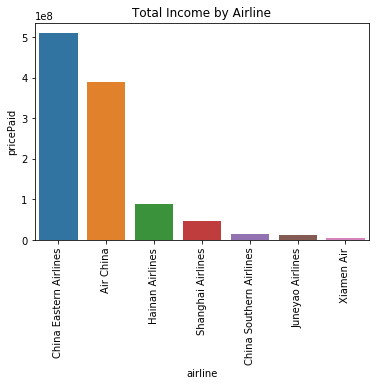

In [118]:
# group by airline
airline_total = df.groupby('airline').agg({'pricePaid':'sum'}).sort_values(by='pricePaid',ascending=False);
# make a bar plot of the airlines
sns.barplot(x=airline_total.index,y=airline_total['pricePaid']);
plt.xticks(rotation=90);
plt.title('Total Income by Airline');
# Do avg ticket cost per airline

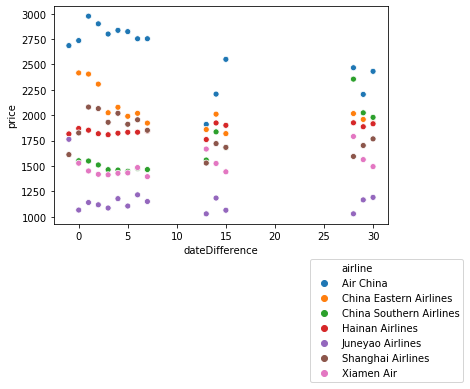

In [119]:
# group by airline and date difference 
ddff= df.groupby(['airline','dateDifference']).agg({'price':'mean'}).reset_index()
sns.scatterplot(x=ddff['dateDifference'],y=ddff['price'],hue=ddff['airline'])
plt.legend(loc = 'lower left',bbox_to_anchor=(.75, -.75))

# use smote or over sampling/interplation to get new values for missing days 

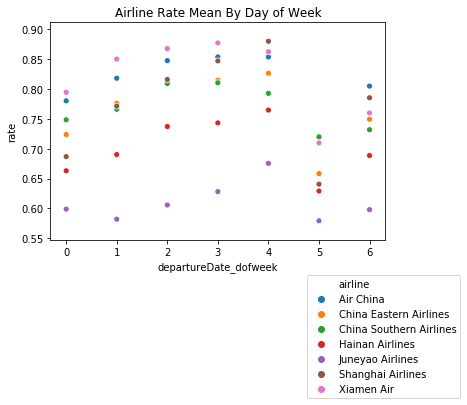

In [120]:
# airline rate mean by dept day of week
dof_air = df.groupby(['airline', 'departureDate_dofweek']).agg({'rate':'mean'}).reset_index()
sns.scatterplot(x=dof_air['departureDate_dofweek'],y=dof_air['rate'],hue=dof_air['airline']);
plt.legend(loc = 'lower left',bbox_to_anchor=(.75, -.75));
plt.title('Airline Rate Mean By Day of Week');

In [121]:
dof_air.head()

,airline,departureDate_dofweek,rate
0,Air China,0,0.779957
1,Air China,1,0.817788
2,Air China,2,0.847237
3,Air China,3,0.853420
4,Air China,4,0.853359


In [122]:
# Get length of trip (trip duration)

In [123]:
# Make visuals for EDA presentation

In [124]:
df.head()

,ID,flightNumber,craftTypeCode,depAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline
0,14393,HO1252,320,PEK,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,1,4,4,3,1860.00,Juneyao Airlines
1,14409,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,1,4,4,3,508.40,China Eastern Airlines
2,14415,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,1,4,4,3,5360.00,China Eastern Airlines
3,14429,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,1,4,4,3,474.15,Hainan Airlines
4,14431,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,1,4,4,3,475.60,Hainan Airlines


In [125]:
airline_ppr = df.groupby(['airline','pricePaid','rate']).agg({'price':'mean'}).reset_index()
# removove anything with rate 0
airline_ppr = airline_ppr[airline_ppr['rate']>0.0]
airline_ppr['difference'] = airline_ppr['price'] - airline_ppr['pricePaid']
airline_ppr = airline_ppr.sort_values(by = 'difference')
airline_ppr.head()

,airline,pricePaid,rate,price,difference
1852,Xiamen Air,3100.0,1.0,3100.0,0.0
472,China Eastern Airlines,5660.0,1.0,5660.0,0.0
473,China Eastern Airlines,6230.0,1.0,6230.0,0.0
570,China Southern Airlines,1240.0,1.0,1240.0,0.0
1589,Shanghai Airlines,1240.0,1.0,1240.0,0.0


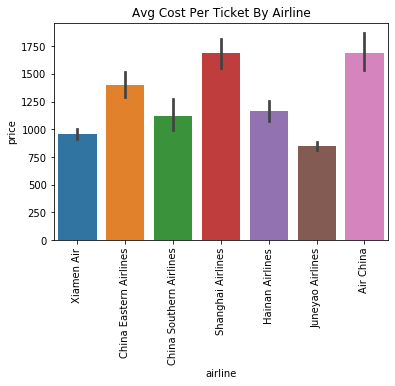

In [126]:
sns.barplot(x = airline_ppr['airline'],y=airline_ppr['price'])
plt.xticks(rotation=90);
plt.title('Avg Cost Per Ticket By Airline');

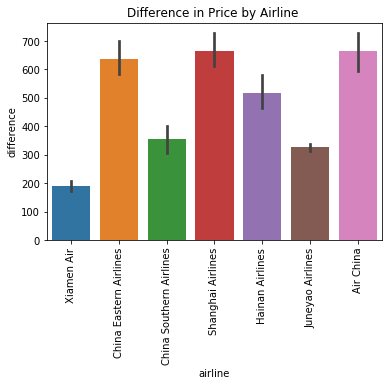

In [127]:
# which airline has the highest difference in price and price paid and who does
sns.barplot(x = airline_ppr['airline'],y=airline_ppr['difference'])
plt.xticks(rotation=90);
plt.title('Difference in Price by Airline ');
#airline_ppr.difference.nunique()

In [128]:
# focus on the bigger airlines maybe?


In [129]:
df.head()

,ID,flightNumber,craftTypeCode,depAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline
0,14393,HO1252,320,PEK,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,1,4,4,3,1860.00,Juneyao Airlines
1,14409,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,1,4,4,3,508.40,China Eastern Airlines
2,14415,MU5138,33L,PEK,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,1,4,4,3,5360.00,China Eastern Airlines
3,14429,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,1,4,4,3,474.15,Hainan Airlines
4,14431,HU7605,350,PEK,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,1,4,4,3,475.60,Hainan Airlines


In [130]:
cabin_mean_earnings2 = df.groupby(df['cabinClass']).agg({'price':'mean'})

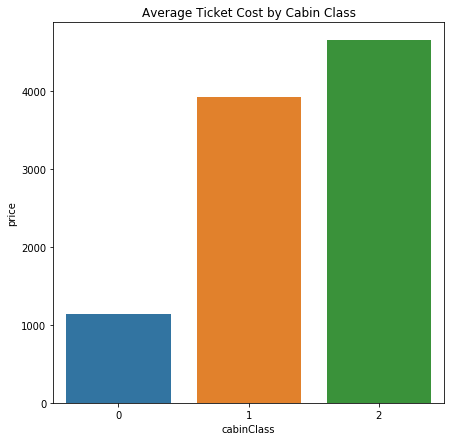

In [131]:
plt.figure(figsize=[7,7])
sns.barplot(x=cabin_mean_earnings2.index, y = cabin_mean_earnings2['price']);
plt.title('Average Ticket Cost by Cabin Class');

# Feature Engineering

In [132]:
# remove all the outlier from df
# make a holiday feature
# make depArp and ArrApt dummy variables since there is only 2 of them?
# change the price columns to proper currency rates
# put coordinate locations 
# change price class into integers
# change datetime objects

In [133]:
# Dummy the departure and arrival features

df = pd.get_dummies(data = df,columns=['arrAirport','depAirport'], drop_first=True)

In [134]:
df.head()

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline,arrAirport_SHA,depAirport_SHA
0,14393,HO1252,320,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,1,4,4,3,1860.00,Juneyao Airlines,1,0
1,14409,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,1,4,4,3,508.40,China Eastern Airlines,1,0
2,14415,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,1,4,4,3,5360.00,China Eastern Airlines,1,0
3,14429,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,1,4,4,3,474.15,Hainan Airlines,1,0
4,14431,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,1,4,4,3,475.60,Hainan Airlines,1,0


In [135]:
# put coordinates of airport 

In [136]:
# calculate the distances

In [137]:
# make a list of important dates to look out for
festivities = ['2019-01-01','2019-01-04','2019-01-05','2019-01-06','2019-01-07','2019-01-08','2019-01-09',
              '2019-04-04','2019-05-01','2019-05-02','2019-05-03','2019-05-04','2019-05-05','2019-06-25',
               '2019-06-26','2019-06-27']



In [138]:
# make a function that sorts throught departure date and checks for holidays
df.departureDate[0]

Timestamp('2019-01-04 06:35:00')

In [139]:
# make a holiday checker function
def HolidayChecker(timestamp):
    year = str(timestamp.year)
    month = str(timestamp.month)
    day = str(timestamp.day)
    
    if len(month) == 1:
        month = '0'+ month 
    
    if len(day) ==1:
        day = '0'+day
        
    return year + '-' + month + '-' + day
        

In [140]:

HolidayChecker(df['departureDate'][0]) in festivities

True

In [141]:
# iterate thru whole data set
# make empty list to append value 
listy_list = []

for timestamp in df['departureDate']:
    listy_list.append(HolidayChecker(timestamp) in festivities)

In [142]:
# make a series of the holiday
df['holiday'] = listy_list

In [143]:
# check to see if it worked
df.sample(10)

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline,arrAirport_SHA,depAirport_SHA,holiday
553133,16339385,HU7608,338,2019-02-08 11:40:00,2019-02-08 14:15:00,0,L,1010,0.68,2019-02-01 12:29:34,7,4,4,4,686.8,Hainan Airlines,0,1,False
40774,49520992,CA1589,773,2019-05-25 20:30:00,2019-05-25 22:40:00,1,J,5660,1.00,2019-04-25 02:23:25,30,5,5,3,5660.0,Air China,1,0,False
7375,54898395,MU5152,32L,2019-05-15 11:30:00,2019-05-15 14:00:00,1,D,3730,0.66,2019-05-14 14:14:56,1,2,2,1,2461.8,China Eastern Airlines,1,0,False
300092,79643350,MU5160,33L,2019-07-29 21:50:00,2019-07-29 23:55:00,0,W,1490,1.00,2019-07-22 11:07:50,7,0,0,0,1490.0,China Eastern Airlines,1,0,False
422251,75713062,MU5159,333,2019-07-25 20:45:00,2019-07-25 23:05:00,0,R,830,0.56,2019-07-11 05:08:42,14,3,3,3,464.8,China Eastern Airlines,0,1,False
168556,60866770,MU5160,33L,2019-06-03 21:50:00,2019-06-03 23:55:00,0,T,520,0.35,2019-06-01 04:55:12,2,0,0,5,182.0,China Eastern Airlines,1,0,False
365200,1869773,CA1886,32A,2019-01-07 21:55:00,2019-01-08 00:20:00,2,F,5680,1.00,2019-01-06 21:21:50,1,0,1,6,5680.0,Air China,0,1,True
316288,70438036,CA1532,32A,2019-07-13 13:55:00,2019-07-13 16:10:00,1,R,2000,0.35,2019-06-28 19:23:35,15,5,5,4,700.0,Air China,0,1,False
499790,19098733,MU5155,32L,2019-02-10 14:30:00,2019-02-10 16:45:00,0,W,1490,1.00,2019-02-06 12:20:46,4,6,6,2,1490.0,China Eastern Airlines,0,1,False
404784,25574143,HU7610,738,2019-02-18 19:15:00,2019-02-18 21:30:00,0,M,890,0.60,2019-02-17 12:29:26,1,0,0,6,534.0,Hainan Airlines,0,1,False


In [144]:
# turn the holiday column into binary numbers
df['holiday'] = [1 if i == True else 0 for i in df.holiday]

In [145]:
# change the currency to the right thing
# make a dict of rates by day and iterate thru it

currency_rate = {}

In [146]:
df.departureDate[0]

Timestamp('2019-01-04 06:35:00')

In [147]:
# import the exchange rates data
ex_rates_df = pd.read_excel('Excelrates.xlsx')
ex_rates_df.head()

,Date,USD,CNY
0,2020-03-19,1,7.1150
1,2020-03-18,1,7.0354
2,2020-03-17,1,7.0201
3,2020-03-16,1,7.0226
4,2020-03-15,1,6.9873


In [148]:
# check data types of df
ex_rates_df.dtypes

Date    datetime64[ns]
USD              int64
CNY            float64
dtype: object

In [149]:
ex_rates_df.head()

,Date,USD,CNY
0,2020-03-19,1,7.1150
1,2020-03-18,1,7.0354
2,2020-03-17,1,7.0201
3,2020-03-16,1,7.0226
4,2020-03-15,1,6.9873


In [150]:
df.head()

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline,arrAirport_SHA,depAirport_SHA,holiday
0,14393,HO1252,320,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,1,4,4,3,1860.00,Juneyao Airlines,1,0,1
1,14409,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,1,4,4,3,508.40,China Eastern Airlines,1,0,1
2,14415,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,1,4,4,3,5360.00,China Eastern Airlines,1,0,1
3,14429,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,1,4,4,3,474.15,Hainan Airlines,1,0,1
4,14431,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,1,4,4,3,475.60,Hainan Airlines,1,0,1


In [151]:
# make an exchange rate column
ex_rates_df['exc_rateC-U'] = ex_rates_df['USD']/ex_rates_df['CNY']

In [152]:
# keep only the 2019 year data
ex_rates_2019_df = ex_rates_df[ex_rates_df['Date'].dt.year == 2019]

In [153]:
ex_rates_2019_df = ex_rates_2019_df.rename({'Date':'DDate'},axis='columns')


In [154]:
ex_rates_2019_df.tail()

,DDate,USD,CNY,exc_rateC-U
439,2019-01-05,1,6.8649,0.145669
440,2019-01-04,1,6.8649,0.145669
441,2019-01-03,1,6.8751,0.145452
442,2019-01-02,1,6.8584,0.145807
443,2019-01-01,1,6.8778,0.145395


In [155]:
df.head()

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline,arrAirport_SHA,depAirport_SHA,holiday
0,14393,HO1252,320,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,1,4,4,3,1860.00,Juneyao Airlines,1,0,1
1,14409,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,1,4,4,3,508.40,China Eastern Airlines,1,0,1
2,14415,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,1,4,4,3,5360.00,China Eastern Airlines,1,0,1
3,14429,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,1,4,4,3,474.15,Hainan Airlines,1,0,1
4,14431,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,1,4,4,3,475.60,Hainan Airlines,1,0,1


In [156]:
# join this data frame with the regular df
ex_rates_2019_df.DDate[79]

Timestamp('2019-12-31 00:00:00')

In [157]:
# turn price into US Dollars
# https://www.exchangerates.org.uk/CNY-USD-exchange-rate-history.html link for currency exchange


In [158]:
ex_rates_2019_df['DDate'] = ex_rates_2019_df['DDate'].dt.date

In [159]:
ex_rates_2019_df.DDate[79]

datetime.date(2019, 12, 31)

In [160]:
df['departureDate'] = pd.to_datetime(df['departureDate'])

In [161]:
df['just_departureDate'] = df['departureDate']
df['just_departureDate'] = df['just_departureDate'].dt.date

In [162]:
df.head()

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline,arrAirport_SHA,depAirport_SHA,holiday,just_departureDate
0,14393,HO1252,320,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,1,4,4,3,1860.00,Juneyao Airlines,1,0,1,2019-01-04
1,14409,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,1,4,4,3,508.40,China Eastern Airlines,1,0,1,2019-01-04
2,14415,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,1,4,4,3,5360.00,China Eastern Airlines,1,0,1,2019-01-04
3,14429,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,1,4,4,3,474.15,Hainan Airlines,1,0,1,2019-01-04
4,14431,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,1,4,4,3,475.60,Hainan Airlines,1,0,1,2019-01-04


In [163]:
ex_rates_2019_df.head()

,DDate,USD,CNY,exc_rateC-U
79,2019-12-31,1,6.9615,0.143647
80,2019-12-30,1,6.9868,0.143127
81,2019-12-29,1,6.9959,0.142941
82,2019-12-28,1,6.9959,0.142941
83,2019-12-27,1,6.9959,0.142941


In [164]:
## merge the 2 dataframes together

df = pd.merge(df, ex_rates_2019_df.rename({"DDate":"just_departureDate"},axis='columns'), on='just_departureDate')



In [165]:
df.head()

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,...,createDate_dofweek,pricePaid,airline,arrAirport_SHA,depAirport_SHA,holiday,just_departureDate,USD,CNY,exc_rateC-U
0,14393,HO1252,320,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,...,3,1860.00,Juneyao Airlines,1,0,1,2019-01-04,1,6.8649,0.145669
1,14409,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,...,3,508.40,China Eastern Airlines,1,0,1,2019-01-04,1,6.8649,0.145669
2,14415,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,...,3,5360.00,China Eastern Airlines,1,0,1,2019-01-04,1,6.8649,0.145669
3,14429,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,...,3,474.15,Hainan Airlines,1,0,1,2019-01-04,1,6.8649,0.145669
4,14431,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,...,3,475.60,Hainan Airlines,1,0,1,2019-01-04,1,6.8649,0.145669


In [166]:
df.head()

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,...,createDate_dofweek,pricePaid,airline,arrAirport_SHA,depAirport_SHA,holiday,just_departureDate,USD,CNY,exc_rateC-U
0,14393,HO1252,320,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,...,3,1860.00,Juneyao Airlines,1,0,1,2019-01-04,1,6.8649,0.145669
1,14409,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,...,3,508.40,China Eastern Airlines,1,0,1,2019-01-04,1,6.8649,0.145669
2,14415,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,...,3,5360.00,China Eastern Airlines,1,0,1,2019-01-04,1,6.8649,0.145669
3,14429,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,...,3,474.15,Hainan Airlines,1,0,1,2019-01-04,1,6.8649,0.145669
4,14431,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,...,3,475.60,Hainan Airlines,1,0,1,2019-01-04,1,6.8649,0.145669


In [167]:
# drop some uneeded columns
df = df.drop(['USD','CNY'], axis=1)

In [168]:
df.head()

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,...,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline,arrAirport_SHA,depAirport_SHA,holiday,just_departureDate,exc_rateC-U
0,14393,HO1252,320,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,1860,1.00,2019-01-03 14:26:15,...,4,4,3,1860.00,Juneyao Airlines,1,0,1,2019-01-04,0.145669
1,14409,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,1640,0.31,2019-01-03 14:26:15,...,4,4,3,508.40,China Eastern Airlines,1,0,1,2019-01-04,0.145669
2,14415,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,5360,1.00,2019-01-03 14:26:15,...,4,4,3,5360.00,China Eastern Airlines,1,0,1,2019-01-04,0.145669
3,14429,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1635,0.29,2019-01-03 14:26:15,...,4,4,3,474.15,Hainan Airlines,1,0,1,2019-01-04,0.145669
4,14431,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,1640,0.29,2019-01-03 14:26:15,...,4,4,3,475.60,Hainan Airlines,1,0,1,2019-01-04,0.145669


In [169]:
# convert the chinesse yuan to USD
df['price'] = df['price']*df['exc_rateC-U']

In [170]:
# make a price paid column by multiplying rate and price
df['pricePaid'] = df['price'] * df['rate']

In [171]:
df.head()

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,...,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline,arrAirport_SHA,depAirport_SHA,holiday,just_departureDate,exc_rateC-U
0,14393,HO1252,320,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,270.943495,1.00,2019-01-03 14:26:15,...,4,4,3,270.943495,Juneyao Airlines,1,0,1,2019-01-04,0.145669
1,14409,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,238.896415,0.31,2019-01-03 14:26:15,...,4,4,3,74.057889,China Eastern Airlines,1,0,1,2019-01-04,0.145669
2,14415,MU5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,780.783405,1.00,2019-01-03 14:26:15,...,4,4,3,780.783405,China Eastern Airlines,1,0,1,2019-01-04,0.145669
3,14429,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,238.168072,0.29,2019-01-03 14:26:15,...,4,4,3,69.068741,Hainan Airlines,1,0,1,2019-01-04,0.145669
4,14431,HU7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,238.896415,0.29,2019-01-03 14:26:15,...,4,4,3,69.279960,Hainan Airlines,1,0,1,2019-01-04,0.145669


In [172]:
# check # of unique values in flight#
df.flightNumber.nunique()

100

In [173]:
# remove the letters in flight numbers and see how many unique values there are
df['flightNumber'] = df['flightNumber'].str[2:]

In [174]:
df.head()

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,...,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline,arrAirport_SHA,depAirport_SHA,holiday,just_departureDate,exc_rateC-U
0,14393,1252,320,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,270.943495,1.00,2019-01-03 14:26:15,...,4,4,3,270.943495,Juneyao Airlines,1,0,1,2019-01-04,0.145669
1,14409,5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,238.896415,0.31,2019-01-03 14:26:15,...,4,4,3,74.057889,China Eastern Airlines,1,0,1,2019-01-04,0.145669
2,14415,5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,780.783405,1.00,2019-01-03 14:26:15,...,4,4,3,780.783405,China Eastern Airlines,1,0,1,2019-01-04,0.145669
3,14429,7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,238.168072,0.29,2019-01-03 14:26:15,...,4,4,3,69.068741,Hainan Airlines,1,0,1,2019-01-04,0.145669
4,14431,7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,238.896415,0.29,2019-01-03 14:26:15,...,4,4,3,69.279960,Hainan Airlines,1,0,1,2019-01-04,0.145669


In [175]:
df.flightNumber.unique()

array(['1252', '5138', '7605', '1831', '5102', '7607', '5156', '3951',
       '5104', '5106', '1531', '5108', '1557', '5152', '5110', '1517',
       '5154', '5114', '1521', '5116', '1515', '7609', '5118', '1549',
       '5120', '7601', '1855', '5122', '9108', '5124', '1857', '5126',
       '1589', '9106', '5128', '7603', '5158', '5160', '5693', '1501',
       '1519', '5112', '1885', '5137', '1858', '5101', '7604', '5151',
       '1590', '5103', '5105', '7606', '1832', '5107', '7608', '1502',
       '5109', '3952', '1520', '5111', '9103', '1532', '5113', '5155',
       '1558', '5115', '5117', '1518', '5119', '5157', '1522', '5121',
       '5123', '1516', '7610', '1550', '5125', '9107', '7602', '1856',
       '5331', '5159', '1886', '1251', '5696', '5153', '7106', '7105',
       '7107', '3907', '8178', '9102', '5390', '8177', '3908', '5389',
       '1583', '1584', '7032', '6412'], dtype=object)

In [176]:
# check dtypes
df.dtypes

ID                                int64
flightNumber                     object
craftTypeCode                    object
departureDate            datetime64[ns]
arrivalDate              datetime64[ns]
cabinClass                        int64
priceClass                       object
price                           float64
rate                            float64
createDate               datetime64[ns]
dateDifference                    int64
departureDate_dofweek             int64
arrivalDate_dofweek               int64
createDate_dofweek                int64
pricePaid                       float64
airline                          object
arrAirport_SHA                    uint8
depAirport_SHA                    uint8
holiday                           int64
just_departureDate               object
exc_rateC-U                     float64
dtype: object

In [177]:
# change the flight number series into an integer
df['flightNumber'] = df['flightNumber'].astype(int)

In [178]:
df.dtypes

ID                                int64
flightNumber                      int64
craftTypeCode                    object
departureDate            datetime64[ns]
arrivalDate              datetime64[ns]
cabinClass                        int64
priceClass                       object
price                           float64
rate                            float64
createDate               datetime64[ns]
dateDifference                    int64
departureDate_dofweek             int64
arrivalDate_dofweek               int64
createDate_dofweek                int64
pricePaid                       float64
airline                          object
arrAirport_SHA                    uint8
depAirport_SHA                    uint8
holiday                           int64
just_departureDate               object
exc_rateC-U                     float64
dtype: object

In [179]:
df.head()

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,...,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline,arrAirport_SHA,depAirport_SHA,holiday,just_departureDate,exc_rateC-U
0,14393,1252,320,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,270.943495,1.00,2019-01-03 14:26:15,...,4,4,3,270.943495,Juneyao Airlines,1,0,1,2019-01-04,0.145669
1,14409,5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,238.896415,0.31,2019-01-03 14:26:15,...,4,4,3,74.057889,China Eastern Airlines,1,0,1,2019-01-04,0.145669
2,14415,5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,780.783405,1.00,2019-01-03 14:26:15,...,4,4,3,780.783405,China Eastern Airlines,1,0,1,2019-01-04,0.145669
3,14429,7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,238.168072,0.29,2019-01-03 14:26:15,...,4,4,3,69.068741,Hainan Airlines,1,0,1,2019-01-04,0.145669
4,14431,7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,238.896415,0.29,2019-01-03 14:26:15,...,4,4,3,69.279960,Hainan Airlines,1,0,1,2019-01-04,0.145669


In [180]:
# check # of unique price class
df['priceClass'].nunique()

32

# Dummy Columns

In [181]:
df.columns

Index(['ID', 'flightNumber', 'craftTypeCode', 'departureDate', 'arrivalDate',
       'cabinClass', 'priceClass', 'price', 'rate', 'createDate',
       'dateDifference', 'departureDate_dofweek', 'arrivalDate_dofweek',
       'createDate_dofweek', 'pricePaid', 'airline', 'arrAirport_SHA',
       'depAirport_SHA', 'holiday', 'just_departureDate', 'exc_rateC-U'],
      dtype='object')

In [182]:
# Dummy depdayof, airline and maybe price class

In [183]:
# pull out columns from df
dummy_columns = df[['airline','departureDate_dofweek']]

In [184]:
# chnage day of week from # to day
weekdays_dict = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [185]:
dummy_columns['departureDate_dofweek'] = [weekdays_dict[day] for day in dummy_columns.departureDate_dofweek]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [186]:
dummy_columns.head()

,airline,departureDate_dofweek
0,Juneyao Airlines,Friday
1,China Eastern Airlines,Friday
2,China Eastern Airlines,Friday
3,Hainan Airlines,Friday
4,Hainan Airlines,Friday


In [187]:
# use get dummies
airline_dummy = pd.get_dummies(df['airline'], drop_first=True)


dof_dummy = pd.get_dummies(dummy_columns['departureDate_dofweek'], drop_first=True)
# drop first parameter helps us avoid the dummy trap

# check to see if it worked
airline_dummy.head()

,China Eastern Airlines,China Southern Airlines,Hainan Airlines,Juneyao Airlines,Shanghai Airlines,Xiamen Air
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [188]:
dof_dummy.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


# Start here for date stuff

In [189]:
df.head()

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,...,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,airline,arrAirport_SHA,depAirport_SHA,holiday,just_departureDate,exc_rateC-U
0,14393,1252,320,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,270.943495,1.00,2019-01-03 14:26:15,...,4,4,3,270.943495,Juneyao Airlines,1,0,1,2019-01-04,0.145669
1,14409,5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,238.896415,0.31,2019-01-03 14:26:15,...,4,4,3,74.057889,China Eastern Airlines,1,0,1,2019-01-04,0.145669
2,14415,5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,780.783405,1.00,2019-01-03 14:26:15,...,4,4,3,780.783405,China Eastern Airlines,1,0,1,2019-01-04,0.145669
3,14429,7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,238.168072,0.29,2019-01-03 14:26:15,...,4,4,3,69.068741,Hainan Airlines,1,0,1,2019-01-04,0.145669
4,14431,7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,238.896415,0.29,2019-01-03 14:26:15,...,4,4,3,69.279960,Hainan Airlines,1,0,1,2019-01-04,0.145669


In [190]:
# make a time of day feature (this will take a few steps)

# make a column the same as departure date
df['departureDate_tod']=df['departureDate']
# turn this column into just the time of the flight
df['departureDate_tod']=df['departureDate_tod'].dt.time


In [191]:
# just get the start of each hour from the time EX/ 7am & 10am
df['departureDate_hod']= [i.hour for i in df['departureDate_tod']]

In [192]:
# make a function that give part of day
def part_of_day(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [193]:
#apply that function to every cell in the the dataframe
df['departureDate_pod'] = [part_of_day(i) for i in df['departureDate_hod']]

In [194]:
#Check to see if it work. It did!
df.head()

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,...,pricePaid,airline,arrAirport_SHA,depAirport_SHA,holiday,just_departureDate,exc_rateC-U,departureDate_tod,departureDate_hod,departureDate_pod
0,14393,1252,320,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,270.943495,1.00,2019-01-03 14:26:15,...,270.943495,Juneyao Airlines,1,0,1,2019-01-04,0.145669,06:35:00,6,Early Morning
1,14409,5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,238.896415,0.31,2019-01-03 14:26:15,...,74.057889,China Eastern Airlines,1,0,1,2019-01-04,0.145669,07:00:00,7,Early Morning
2,14415,5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,780.783405,1.00,2019-01-03 14:26:15,...,780.783405,China Eastern Airlines,1,0,1,2019-01-04,0.145669,07:00:00,7,Early Morning
3,14429,7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,238.168072,0.29,2019-01-03 14:26:15,...,69.068741,Hainan Airlines,1,0,1,2019-01-04,0.145669,07:20:00,7,Early Morning
4,14431,7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,238.896415,0.29,2019-01-03 14:26:15,...,69.279960,Hainan Airlines,1,0,1,2019-01-04,0.145669,07:20:00,7,Early Morning


In [195]:
df.dtypes

ID                                int64
flightNumber                      int64
craftTypeCode                    object
departureDate            datetime64[ns]
arrivalDate              datetime64[ns]
cabinClass                        int64
priceClass                       object
price                           float64
rate                            float64
createDate               datetime64[ns]
dateDifference                    int64
departureDate_dofweek             int64
arrivalDate_dofweek               int64
createDate_dofweek                int64
pricePaid                       float64
airline                          object
arrAirport_SHA                    uint8
depAirport_SHA                    uint8
holiday                           int64
just_departureDate               object
exc_rateC-U                     float64
departureDate_tod                object
departureDate_hod                 int64
departureDate_pod                object
dtype: object

In [196]:
# dummy departure date pod
pod_dummy = df[['departureDate_pod']]
pod_dummies = pd.get_dummies(pod_dummy['departureDate_pod'], drop_first=True)
pod_dummies.head()

,Eve,Morning,Night,Noon
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [197]:
# remove columns before dropping outliers

In [198]:
df.shape

(568917, 24)

In [199]:
df.columns

Index(['ID', 'flightNumber', 'craftTypeCode', 'departureDate', 'arrivalDate',
       'cabinClass', 'priceClass', 'price', 'rate', 'createDate',
       'dateDifference', 'departureDate_dofweek', 'arrivalDate_dofweek',
       'createDate_dofweek', 'pricePaid', 'airline', 'arrAirport_SHA',
       'depAirport_SHA', 'holiday', 'just_departureDate', 'exc_rateC-U',
       'departureDate_tod', 'departureDate_hod', 'departureDate_pod'],
      dtype='object')

In [200]:

# make a new feature for cabin class that says economy bussiness and first class
df['cabinClass_type'] = df['cabinClass']

# make a dictionary of values and what you what to convert the values to
cabin_key = {0:'Economy_Class',1:'Bussiness_Class', 2:'First_Class'}
# make a list comphrehension and iterate through the series replacing all the letters with numbers
df['cabinClass_type'] = [cabin_key[letter] for letter in df.cabinClass_type]

#df = pd.get_dummies(df,columns='cabinClass_type',drop_first=True)

In [201]:
df.head()

,ID,flightNumber,craftTypeCode,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,...,airline,arrAirport_SHA,depAirport_SHA,holiday,just_departureDate,exc_rateC-U,departureDate_tod,departureDate_hod,departureDate_pod,cabinClass_type
0,14393,1252,320,2019-01-04 06:35:00,2019-01-04 08:55:00,1,C,270.943495,1.00,2019-01-03 14:26:15,...,Juneyao Airlines,1,0,1,2019-01-04,0.145669,06:35:00,6,Early Morning,Bussiness_Class
1,14409,5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,I,238.896415,0.31,2019-01-03 14:26:15,...,China Eastern Airlines,1,0,1,2019-01-04,0.145669,07:00:00,7,Early Morning,Bussiness_Class
2,14415,5138,33L,2019-01-04 07:00:00,2019-01-04 09:15:00,1,J,780.783405,1.00,2019-01-03 14:26:15,...,China Eastern Airlines,1,0,1,2019-01-04,0.145669,07:00:00,7,Early Morning,Bussiness_Class
3,14429,7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,238.168072,0.29,2019-01-03 14:26:15,...,Hainan Airlines,1,0,1,2019-01-04,0.145669,07:20:00,7,Early Morning,Bussiness_Class
4,14431,7605,350,2019-01-04 07:20:00,2019-01-04 09:35:00,1,I,238.896415,0.29,2019-01-03 14:26:15,...,Hainan Airlines,1,0,1,2019-01-04,0.145669,07:20:00,7,Early Morning,Bussiness_Class


In [202]:
# make cabin class a dummy variable
# make a dummie data frame of the cabin class
dummies = pd.get_dummies(df['cabinClass_type'],drop_first=True)
dummies.head()

# combine the dummies and the df togther # uncomment line below
#df = pd.concat([dummies,df],axis=1)


,Economy_Class,First_Class
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [203]:
df = pd.concat([pod_dummies,df],axis=1)

In [204]:
df = pd.concat([airline_dummy,df],axis=1)

In [205]:
df = pd.concat([dof_dummy,df],axis=1)

In [206]:
df.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,China Eastern Airlines,China Southern Airlines,Hainan Airlines,Juneyao Airlines,...,airline,arrAirport_SHA,depAirport_SHA,holiday,just_departureDate,exc_rateC-U,departureDate_tod,departureDate_hod,departureDate_pod,cabinClass_type
0,0,0,0,0,0,0,0,0,0,1,...,Juneyao Airlines,1,0,1,2019-01-04,0.145669,06:35:00,6,Early Morning,Bussiness_Class
1,0,0,0,0,0,0,1,0,0,0,...,China Eastern Airlines,1,0,1,2019-01-04,0.145669,07:00:00,7,Early Morning,Bussiness_Class
2,0,0,0,0,0,0,1,0,0,0,...,China Eastern Airlines,1,0,1,2019-01-04,0.145669,07:00:00,7,Early Morning,Bussiness_Class
3,0,0,0,0,0,0,0,0,1,0,...,Hainan Airlines,1,0,1,2019-01-04,0.145669,07:20:00,7,Early Morning,Bussiness_Class
4,0,0,0,0,0,0,0,0,1,0,...,Hainan Airlines,1,0,1,2019-01-04,0.145669,07:20:00,7,Early Morning,Bussiness_Class


In [207]:
# make a dummie data frame of the cabin class
dummies = pd.get_dummies(df['cabinClass_type'],drop_first=True)
dummies.head()

,Economy_Class,First_Class
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


# Unmark the cell below Maybe

In [208]:
# combine the dummies and the df togther
df = pd.concat([dummies,df],axis=1)

In [209]:
# make a new dataframe same as the old one
pdf = df

In [210]:
# check columns
pdf.columns

Index(['Economy_Class', 'First_Class', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'China Eastern Airlines',
       'China Southern Airlines', 'Hainan Airlines', 'Juneyao Airlines',
       'Shanghai Airlines', 'Xiamen Air', 'Eve', 'Morning', 'Night', 'Noon',
       'ID', 'flightNumber', 'craftTypeCode', 'departureDate', 'arrivalDate',
       'cabinClass', 'priceClass', 'price', 'rate', 'createDate',
       'dateDifference', 'departureDate_dofweek', 'arrivalDate_dofweek',
       'createDate_dofweek', 'pricePaid', 'airline', 'arrAirport_SHA',
       'depAirport_SHA', 'holiday', 'just_departureDate', 'exc_rateC-U',
       'departureDate_tod', 'departureDate_hod', 'departureDate_pod',
       'cabinClass_type'],
      dtype='object')

In [211]:
# Drop unneeded columns
pdf = pdf.drop(['craftTypeCode','priceClass','just_departureDate','ID','airline',
                'departureDate_pod','departureDate','arrivalDate','departureDate_tod',
                'createDate','departureDate_pod','cabinClass_type'],axis=1)


In [212]:
# Check the data types of each columns
pdf.dtypes

Economy_Class                uint8
First_Class                  uint8
Monday                       uint8
Saturday                     uint8
Sunday                       uint8
Thursday                     uint8
Tuesday                      uint8
Wednesday                    uint8
China Eastern Airlines       uint8
China Southern Airlines      uint8
Hainan Airlines              uint8
Juneyao Airlines             uint8
Shanghai Airlines            uint8
Xiamen Air                   uint8
Eve                          uint8
Morning                      uint8
Night                        uint8
Noon                         uint8
flightNumber                 int64
cabinClass                   int64
price                      float64
rate                       float64
dateDifference               int64
departureDate_dofweek        int64
arrivalDate_dofweek          int64
createDate_dofweek           int64
pricePaid                  float64
arrAirport_SHA               uint8
depAirport_SHA      

In [213]:
# drop the outliers with Z scores
# use scipy to drop outliers over 2.5,  or 3
pdf.head()

,Economy_Class,First_Class,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,China Eastern Airlines,China Southern Airlines,...,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,arrAirport_SHA,depAirport_SHA,holiday,exc_rateC-U,departureDate_hod
0,0,0,0,0,0,0,0,0,0,0,...,1,4,4,3,270.943495,1,0,1,0.145669,6
1,0,0,0,0,0,0,0,0,1,0,...,1,4,4,3,74.057889,1,0,1,0.145669,7
2,0,0,0,0,0,0,0,0,1,0,...,1,4,4,3,780.783405,1,0,1,0.145669,7
3,0,0,0,0,0,0,0,0,0,0,...,1,4,4,3,69.068741,1,0,1,0.145669,7
4,0,0,0,0,0,0,0,0,0,0,...,1,4,4,3,69.279960,1,0,1,0.145669,7


In [214]:
# import needed library
from scipy.stats import zscore


In [215]:
# drop the outliers with standard scalar
# use scipy to drop outliers over 2.5,  or 3

# This is returning and array, but we want a dataframe
z_scores_df =  zscore(pdf)

In [216]:
# Turn this array into a dataframe and make the columns the same as the pdf columns
z_scores_df = pd.DataFrame(z_scores_df, columns=pdf.columns)

In [217]:
# Filter out any zscores over an absolute value of 3
z_scores_df = z_scores_df[(np.abs(z_scores_df)<=3)]

In [218]:
# take the non outliers from the z_score_df and make a no outliers df using the index of the columns
no_out_df = pdf.iloc[z_scores_df.index]


In [219]:
# order the dataframe by index
no_out_df = no_out_df.sort_index(ascending=True)

In [220]:
# check to see if everything worked
no_out_df.shape
# there were no outliers in my data

(568917, 32)

In [221]:
no_out_df.columns

Index(['Economy_Class', 'First_Class', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'China Eastern Airlines',
       'China Southern Airlines', 'Hainan Airlines', 'Juneyao Airlines',
       'Shanghai Airlines', 'Xiamen Air', 'Eve', 'Morning', 'Night', 'Noon',
       'flightNumber', 'cabinClass', 'price', 'rate', 'dateDifference',
       'departureDate_dofweek', 'arrivalDate_dofweek', 'createDate_dofweek',
       'pricePaid', 'arrAirport_SHA', 'depAirport_SHA', 'holiday',
       'exc_rateC-U', 'departureDate_hod'],
      dtype='object')

In [ ]:
# see the avg cost of ticket by part of day

In [222]:
# groupby part of day and get the mean price
phases = df.groupby('departureDate_pod').agg({'price':'mean'})

In [223]:
phases

,price
departureDate_pod,
Early Morning,303.611940
Eve,340.825892
Morning,324.480753
Night,270.287415
Noon,346.402416


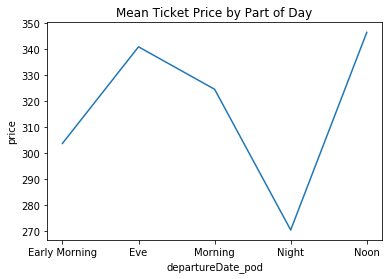

In [224]:
# plot the values 
sns.lineplot(phases.index, phases['price']);
plt.title('Mean Ticket Price by Part of Day');


In [225]:
hourly_avgs = pdf.groupby(['departureDate_hod','cabinClass']).agg({'price':'mean'}).reset_index()

In [228]:
hourly_avgs.head()

,departureDate_hod,cabinClass,price
0,6,0,108.585469
1,6,1,300.270596
2,6,2,357.111761
3,7,0,155.126941
4,7,1,559.830158


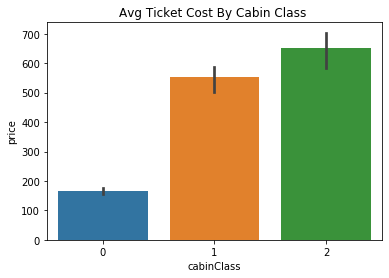

In [378]:
sns.barplot(x=hourly_avgs['cabinClass'],y=hourly_avgs['price']);
plt.title('Avg Ticket Cost By Cabin Class ');
# not correct visual

In [230]:
no_out_df.columns

Index(['Economy_Class', 'First_Class', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'China Eastern Airlines',
       'China Southern Airlines', 'Hainan Airlines', 'Juneyao Airlines',
       'Shanghai Airlines', 'Xiamen Air', 'Eve', 'Morning', 'Night', 'Noon',
       'flightNumber', 'cabinClass', 'price', 'rate', 'dateDifference',
       'departureDate_dofweek', 'arrivalDate_dofweek', 'createDate_dofweek',
       'pricePaid', 'arrAirport_SHA', 'depAirport_SHA', 'holiday',
       'exc_rateC-U', 'departureDate_hod'],
      dtype='object')

# Modeling

### Make sure to Cross Validate All models

### Make a train, test, and validation data set
## change from no_out_df to df

In [245]:
# make a target variable
y2 = no_out_df['price']
#make feature variables
X2 = no_out_df.drop(['price','pricePaid','flightNumber','exc_rateC-U','cabinClass','departureDate_hod',
                    'departureDate_dofweek', 'arrivalDate_dofweek', 'createDate_dofweek','rate'],axis=1)

In [246]:
# get training and test data using train test split
X_train2, X_test2, y_train2,y_test2 = train_test_split(X2,y2,test_size=.2,random_state=1)

In [247]:
# make a validation set
X_train2,X_val2,y_train2,y_val2 = train_test_split(X_train2,y_train2,test_size=.2,random_state=1)

In [248]:
# make sure to cross validate all the Models

In [249]:
X_train2.dtypes

Economy_Class              uint8
First_Class                uint8
Monday                     uint8
Saturday                   uint8
Sunday                     uint8
Thursday                   uint8
Tuesday                    uint8
Wednesday                  uint8
China Eastern Airlines     uint8
China Southern Airlines    uint8
Hainan Airlines            uint8
Juneyao Airlines           uint8
Shanghai Airlines          uint8
Xiamen Air                 uint8
Eve                        uint8
Morning                    uint8
Night                      uint8
Noon                       uint8
dateDifference             int64
arrAirport_SHA             uint8
depAirport_SHA             uint8
holiday                    int64
dtype: object

In [250]:
X_train2.head()

,Economy_Class,First_Class,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,China Eastern Airlines,China Southern Airlines,...,Shanghai Airlines,Xiamen Air,Eve,Morning,Night,Noon,dateDifference,arrAirport_SHA,depAirport_SHA,holiday
275304,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,7,0,1,0
76286,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,6,1,0,0
514158,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0
297430,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,3,0,1,0
425969,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


# Linear Regression No Outliers

In [251]:
# instantiate the model
Nlinreg = LinearRegression()
# fit the model to the train data
Nlinreg.fit(X_train2,y_train2)

# get the prediction
Ny_preds = Nlinreg.predict(X_val2)

# calculate the mse and rmse
Nmse_linreg = mean_squared_error(y_val2, Ny_preds)
Nrmse_linreg = np.sqrt(mean_squared_error(y_val2, Ny_preds))

print(f'the mean squared error for Linear Regression Vanilla is: {Nmse_linreg}'.title())
print(f'the Root Mean Squared Error is : {Nrmse_linreg}')
print(f'The R^2 value is : {r2_score(y_val2,Ny_preds)}')

The Mean Squared Error For Linear Regression Vanilla Is: 19122.63765713116
the Root Mean Squared Error is : 138.28462552695856
The R^2 value is : 0.7136602306163402


# Logistic Regression No Outliers

# XGBoost No Outliers

In [252]:
# instantiate the model
Nxgb = xgboost.XGBRegressor()
# fit the model to training data
Nxgb.fit(X_train2,y_train2)
# get the prediction
Nxgb_y_preds = Nxgb.predict(X_val2)
# get the mse and rmse
Nmse_xgb = mean_squared_error(y_val2,Nxgb_y_preds)
Nrmse_xgb = np.sqrt(mean_squared_error(y_val2,Nxgb_y_preds))
print(f'the Mean Squared Error is : {Nmse_xgb}')
print(f'the Root Mean Squared Error is : {Nrmse_xgb}')
print(f'The R^2 value is : {r2_score(y_val2,Nxgb_y_preds)}')

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:49:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the Mean Squared Error is : 18191.098622143607
the Root Mean Squared Error is : 134.87438089623842
The R^2 value is : 0.7276089691341534


In [253]:
pd.DataFrame(Nxgb.feature_importances_, index=X_train2.columns)

,0
Economy_Class,0.853530
First_Class,0.029427
Monday,0.003269
Saturday,0.007517
Sunday,0.003204
Thursday,0.003386
Tuesday,0.001742
Wednesday,0.003882
China Eastern Airlines,0.013740
China Southern Airlines,0.013895


# Gradient Boosting No Outliers

In [254]:
# instantiate the model
Ngdb = GradientBoostingRegressor()
# fit the model to training data
Ngdb.fit(X_train2,y_train2)

# get predictions
Ngdb_preds = Ngdb.predict(X_val2)

#get MeanSE
Nmse_gdb = mean_squared_error(Ngdb_preds,y_val2)
Nrmse_gdb = np.sqrt(mean_squared_error(Ngdb_preds,y_val2))
print(f'the mean squared error for gradient boosting test data is {Nmse_gdb}')
print(f'the root mean squared error is:{Nrmse_gdb}')
print(f'The R^2 value is : {r2_score(y_val2,Ngdb_preds)}')

the mean squared error for gradient boosting test data is 18188.223178346616
the root mean squared error is:134.86372076413514
The R^2 value is : 0.7276520256375747


In [255]:
pd.DataFrame(Ngdb.feature_importances_, index=X_train2.columns)

,0
Economy_Class,0.934428
First_Class,0.021907
Monday,0.001181
Saturday,0.003515
Sunday,0.000636
Thursday,0.000138
Tuesday,0.000207
Wednesday,0.000086
China Eastern Airlines,0.006148
China Southern Airlines,0.004482


# AdaBoosting No Outliers

In [256]:
# instantaite adaboost model
Nada = AdaBoostRegressor()

# fit the model to the train data
Nada.fit(X_train2,y_train2)

# get the prediction
Nada_preds = Nada.predict(X_val2)
# get the MSE
Nmse_ada = mean_squared_error(y_val2, Nada_preds)
Nrmse_ada = np.sqrt(mean_squared_error(y_val2, Nada_preds))

#print the mse
print(f'The Mean squared error for the ada boost model is {Nmse_ada}')
print(f'The Root Mean squared error for the ada boost model is {Nrmse_ada}')
print(f'The R^2 value is : {r2_score(y_val2,Nada_preds)}')

The Mean squared error for the ada boost model is 19459.074022258228
The Root Mean squared error for the ada boost model is 139.4957849623358
The R^2 value is : 0.7086224783496262


In [257]:
pd.DataFrame(Nada.feature_importances_, index=X_train2.columns)

,0
Economy_Class,0.958533
First_Class,0.015791
Monday,0.000016
Saturday,0.002643
Sunday,0.000000
Thursday,0.000000
Tuesday,0.000000
Wednesday,0.000000
China Eastern Airlines,0.003350
China Southern Airlines,0.003812


# Random Forrest No Outliers

In [258]:
# instantiate the model
Nrfr = RandomForestRegressor()

# fit the model to training data
Nrfr.fit(X_train2, y_train2)

# Get predictions
Nrfr_preds = Nrfr.predict(X_val2)

# get MSE and RMSE for model
Nmse_rfr = mean_squared_error(y_val2, Nrfr_preds)
Nrmse_rfr = np.sqrt(mean_squared_error(y_val2, Nrfr_preds))
# print Mse
print(f'The mean squared error for Random Forest Validation Data is: {Nmse_rfr} ')
print(f'The Root mean squared error for Random Forest Validation Data is: {Nrmse_rfr} ')
print(f'The R^2 value is : {r2_score(y_val2,Nrfr_preds)}')

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The mean squared error for Random Forest Validation Data is: 18569.521352924145 
The Root mean squared error for Random Forest Validation Data is: 136.27003101534888 
The R^2 value is : 0.7219425187519373


In [369]:
yyyyy = df.groupby(['cabinClass']).agg({'price':'mean'}).reset_index()

In [370]:
yyyyy.head()

,cabinClass,price
0,0,167.255201
1,1,577.310468
2,2,688.021957


In [259]:
# All these models are over fit: have to fix this

# SHA-PEK models

In [260]:
pdf.head()

,Economy_Class,First_Class,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,China Eastern Airlines,China Southern Airlines,...,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,arrAirport_SHA,depAirport_SHA,holiday,exc_rateC-U,departureDate_hod
0,0,0,0,0,0,0,0,0,0,0,...,1,4,4,3,270.943495,1,0,1,0.145669,6
1,0,0,0,0,0,0,0,0,1,0,...,1,4,4,3,74.057889,1,0,1,0.145669,7
2,0,0,0,0,0,0,0,0,1,0,...,1,4,4,3,780.783405,1,0,1,0.145669,7
3,0,0,0,0,0,0,0,0,0,0,...,1,4,4,3,69.068741,1,0,1,0.145669,7
4,0,0,0,0,0,0,0,0,0,0,...,1,4,4,3,69.279960,1,0,1,0.145669,7


In [261]:
# make 2 different data sets. One with departure form PEK the other from SHA
sha_pdf = pdf[pdf['depAirport_SHA']!=0]
pek_pdf = pdf[pdf['depAirport_SHA']==0]

In [262]:
sha_pdf.columns

Index(['Economy_Class', 'First_Class', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'China Eastern Airlines',
       'China Southern Airlines', 'Hainan Airlines', 'Juneyao Airlines',
       'Shanghai Airlines', 'Xiamen Air', 'Eve', 'Morning', 'Night', 'Noon',
       'flightNumber', 'cabinClass', 'price', 'rate', 'dateDifference',
       'departureDate_dofweek', 'arrivalDate_dofweek', 'createDate_dofweek',
       'pricePaid', 'arrAirport_SHA', 'depAirport_SHA', 'holiday',
       'exc_rateC-U', 'departureDate_hod'],
      dtype='object')

In [263]:
 # make variables 
X2S = sha_pdf.drop(['price','exc_rateC-U','pricePaid','rate',
                    'cabinClass','flightNumber','departureDate_hod','departureDate_dofweek',
                   'arrivalDate_dofweek','createDate_dofweek'],axis=1)
y2S = sha_pdf['price']

In [264]:
# do train test split
X2S_train,X2S_test,y2S_train,y2S_test = train_test_split(X2S,y2S, test_size=.2,random_state=1)

In [265]:
# make validation set
X2S_train,X2S_val, y2S_train,y2S_val = train_test_split(X2S_train,y2S_train,test_size=.2,random_state=1)

# Linear regression SHA-PEK

In [266]:
# instantiate the model
Slinreg = LinearRegression()
# fit the model to the train data
Slinreg.fit(X2S_train,y2S_train)

# get the prediction
Sy_preds = Slinreg.predict(X2S_val)

# calculate the mse and rmse
Smse_linreg = mean_squared_error(y2S_val, Sy_preds)
Srmse_linreg = np.sqrt(mean_squared_error(y2S_val, Sy_preds))

print(f'the mean squared error for Linear Regression Vanilla is: {Smse_linreg}'.title())
print(f'the Root Mean Squared Error is : {Srmse_linreg}')
print(f'The R^2 value is : {r2_score(y2S_val,Sy_preds)}')

The Mean Squared Error For Linear Regression Vanilla Is: 19066.579600269975
the Root Mean Squared Error is : 138.08178591063333
The R^2 value is : 0.7092890747496711


# XG Boost 

In [267]:
# instantiate the model
Sxgb = xgboost.XGBRegressor()
# fit the model to training data
Sxgb.fit(X2S_train,y2S_train)

Sxgb_y_preds = Sxgb.predict(X2S_val)
Smse_xgb = mean_squared_error(y2S_val,Sxgb_y_preds)
Srmse_xgb = np.sqrt(mean_squared_error(y2S_val,Sxgb_y_preds))
print(f'the Mean Squared Error is : {Smse_xgb}')
print(f'the Root Mean Squared Error is : {Srmse_xgb}')
print(f'The R^2 value is : {r2_score(y2S_val,Sxgb_y_preds)}')

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:51:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the Mean Squared Error is : 18096.505139282464
the Root Mean Squared Error is : 134.52325129613268
The R^2 value is : 0.724079941807515


In [268]:
# get the feature importance of the model
bxgb_feats = pd.DataFrame(Sxgb.feature_importances_, index=X2S_train.columns).sort_values(by=0,ascending=False)
# turning it into a Dataframe makes it easier to work with

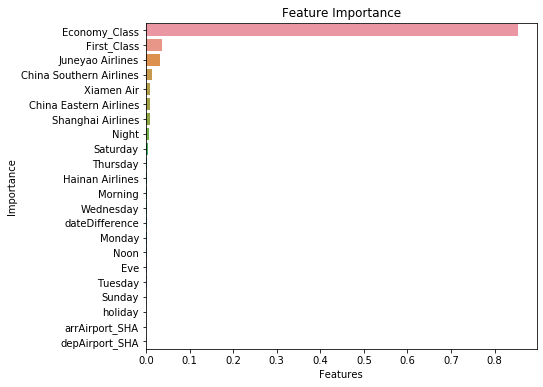

In [269]:
plt.figure(figsize=[7,6])
sns.barplot(y=bxgb_feats.index,x=bxgb_feats[0],orient='h');
plt.title('Feature Importance');
plt.ylabel('Importance');
plt.xlabel('Features');

# Gradient Boosting

In [270]:
# instantiate the model
Sgdb = GradientBoostingRegressor()
# fit the model to training data
Sgdb.fit(X2S_train,y2S_train)

# get predictions
Sgdb_preds = Sgdb.predict(X2S_val)

#get MeanSE
Smse_gdb = mean_squared_error(Sgdb_preds,y2S_val)
Srmse_gdb = np.sqrt(mean_squared_error(Sgdb_preds,y2S_val))
print(f'the mean squared error for gradient boosting test data is {Smse_gdb}')
print(f'the root mean squared error is:{Srmse_gdb}')
print(f'The R^2 value is : {r2_score(y2S_val,Sgdb_preds)}')

the mean squared error for gradient boosting test data is 18095.4325582031
the root mean squared error is:134.51926463597363
The R^2 value is : 0.724096295607962


In [271]:
pd.DataFrame(Sgdb.feature_importances_, index=X2S_train.columns).sort_values(by=0,ascending=True)

,0
arrAirport_SHA,0.000000
depAirport_SHA,0.000000
holiday,0.000042
Noon,0.000185
Wednesday,0.000191
Sunday,0.000198
Tuesday,0.000275
Thursday,0.000295
Morning,0.000313
Eve,0.000339


In [272]:
X2S_train.dtypes

Economy_Class              uint8
First_Class                uint8
Monday                     uint8
Saturday                   uint8
Sunday                     uint8
Thursday                   uint8
Tuesday                    uint8
Wednesday                  uint8
China Eastern Airlines     uint8
China Southern Airlines    uint8
Hainan Airlines            uint8
Juneyao Airlines           uint8
Shanghai Airlines          uint8
Xiamen Air                 uint8
Eve                        uint8
Morning                    uint8
Night                      uint8
Noon                       uint8
dateDifference             int64
arrAirport_SHA             uint8
depAirport_SHA             uint8
holiday                    int64
dtype: object

# AdaBoost

In [273]:
# instantaite adaboost model
Sada = AdaBoostRegressor()

# fit the model to the train data
Sada.fit(X2S_train,y2S_train)

# get the prediction
Sada_preds = Sada.predict(X2S_val)
# get the MSE
Smse_ada = mean_squared_error(y2S_val, Sada_preds)
Srmse_ada = np.sqrt(mean_squared_error(y2S_val, Sada_preds))

#print the mse
print(f'The Mean squared error for the ada boost model is {Smse_ada}')
print(f'The Root Mean squared error for the ada boost model is {Srmse_ada}')
print(f'The R^2 value is : {r2_score(y2S_val,Sada_preds)}')

The Mean squared error for the ada boost model is 19257.627212985837
The Root Mean squared error for the ada boost model is 138.77185310064084
The R^2 value is : 0.7063761438819496


In [274]:
pd.DataFrame(Sada.feature_importances_, index=X2S_train.columns)

,0
Economy_Class,0.958109
First_Class,0.015946
Monday,0.000006
Saturday,0.000187
Sunday,0.000000
Thursday,0.000000
Tuesday,0.000000
Wednesday,0.000000
China Eastern Airlines,0.002741
China Southern Airlines,0.004754


In [275]:
# instantiate the model
Srfr = RandomForestRegressor()

# fit the model to training data
Srfr.fit(X2S_train, y2S_train)

# Get predictions
Srfr_preds = Srfr.predict(X2S_val)

# get MSE and RMSE for model
Smse_rfr = mean_squared_error(y2S_val, Srfr_preds)
Srmse_rfr = np.sqrt(mean_squared_error(y2S_val, Srfr_preds))
# print Mse
print(f'The mean squared error for Random Forest Validation Data is: {Smse_rfr} ')
print(f'The Root mean squared error for Random Forest Validation Data is: {Srmse_rfr} ')
print(f'The R^2 value is : {r2_score(y2S_val,Srfr_preds)}')

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The mean squared error for Random Forest Validation Data is: 18892.071278932333 
The Root mean squared error for Random Forest Validation Data is: 137.44843134402203 
The R^2 value is : 0.7119498286249613


In [276]:
pd.DataFrame(Srfr.feature_importances_, index=X2S_train.columns)

,0
Economy_Class,0.900764
First_Class,0.019495
Monday,0.001699
Saturday,0.002771
Sunday,0.001713
Thursday,0.001749
Tuesday,0.001658
Wednesday,0.001847
China Eastern Airlines,0.007377
China Southern Airlines,0.004515


In [374]:
yyyyy

,cabinClass,price
0,0,167.255201
1,1,577.310468
2,2,688.021957


In [377]:
yy_key = {'Economy':0,'Business':1,'First Class':2}
# make a list comphrehension and iterate through the series replacing all the letters with numbers
[yy_key[letter] for letter in yyyyy.cabinClass]

KeyError: 0

# PEK - SHA models

In [ ]:
# make variables and do train test split

In [277]:
X2P = pek_pdf.drop(['price','exc_rateC-U','pricePaid','rate','cabinClass',
                   'flightNumber','departureDate_hod','departureDate_dofweek',
                   'arrivalDate_dofweek','createDate_dofweek'],axis=1)
y2P = pek_pdf['price']

In [278]:
# do train test split
X2P_train,X2P_test,y2P_train,y2P_test = train_test_split(X2P,y2P, test_size=.2,random_state=1)

In [279]:
# make validation set
X2P_train,X2P_val, y2P_train,y2P_val = train_test_split(X2P_train,y2P_train,test_size=.2,random_state=1)

In [280]:
X2P_train.shape

(192214, 22)

In [281]:
X2P_train.dtypes

Economy_Class              uint8
First_Class                uint8
Monday                     uint8
Saturday                   uint8
Sunday                     uint8
Thursday                   uint8
Tuesday                    uint8
Wednesday                  uint8
China Eastern Airlines     uint8
China Southern Airlines    uint8
Hainan Airlines            uint8
Juneyao Airlines           uint8
Shanghai Airlines          uint8
Xiamen Air                 uint8
Eve                        uint8
Morning                    uint8
Night                      uint8
Noon                       uint8
dateDifference             int64
arrAirport_SHA             uint8
depAirport_SHA             uint8
holiday                    int64
dtype: object

# Sha-Pek Models

# Linear Regression

In [282]:
# instantiate the model
Plinreg = LinearRegression()
# fit the model to the train data
Plinreg.fit(X2P_train,y2P_train)

# get the prediction
Py_preds = Plinreg.predict(X2P_val)

# calculate the mse and rmse
Pmse_linreg = mean_squared_error(y2P_val, Py_preds)
Prmse_linreg = np.sqrt(mean_squared_error(y2P_val, Py_preds))

print(f'the mean squared error for Linear Regression Vanilla is: {Pmse_linreg}'.title())
print(f'the Root Mean Squared Error is : {Prmse_linreg}')
print(f'The R^2 value is : {r2_score(y2P_val,Py_preds)}')

The Mean Squared Error For Linear Regression Vanilla Is: 18570.83492146593
the Root Mean Squared Error is : 136.27485065655338
The R^2 value is : 0.7251203470158206


In [283]:
# instantiate the model
Pxgb = xgboost.XGBRegressor()
# fit the model to training data
Pxgb.fit(X2P_train,y2P_train)
# get predictions
Pxgb_y_preds = Pxgb.predict(X2P_val)
# get mse and rmse
Pmse_xgb = mean_squared_error(y2P_val,Pxgb_y_preds)
Prmse_xgb = np.sqrt(mean_squared_error(y2P_val,Pxgb_y_preds))
print(f'the Mean Squared Error is : {Pmse_xgb}')
print(f'the Root Mean Squared Error is : {Prmse_xgb}')
print(f'The R^2 value is : {r2_score(y2P_val,Pxgb_y_preds)}')

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:52:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the Mean Squared Error is : 17620.499769708702
the Root Mean Squared Error is : 132.74223054366948
The R^2 value is : 0.7391869087960743


In [284]:
# instantiate the model
Pgdb = GradientBoostingRegressor()
# fit the model to training data
Pgdb.fit(X2P_train,y2P_train)

# get predictions
Pgdb_preds = Pgdb.predict(X2P_val)

#get MeanSE
Pmse_gdb = mean_squared_error(Pgdb_preds,y2P_val)
Prmse_gdb = np.sqrt(mean_squared_error(Pgdb_preds,y2P_val))
print(f'the mean squared error for gradient boosting test data is {Pmse_gdb}')
print(f'the root mean squared error is:{Prmse_gdb}')
print(f'The R^2 value is : {r2_score(y2P_val,Pgdb_preds)}')

the mean squared error for gradient boosting test data is 17622.054138398573
the root mean squared error is:132.74808525322908
The R^2 value is : 0.739163901519994


In [285]:
gdb_features = pd.DataFrame(Pgdb.feature_importances_, index=X2P_train.columns).sort_values(by=0,ascending=False)

In [286]:
gdb_features.head()

,0
Economy_Class,0.927954
First_Class,0.021323
Juneyao Airlines,0.014655
China Eastern Airlines,0.007578
Saturday,0.006103


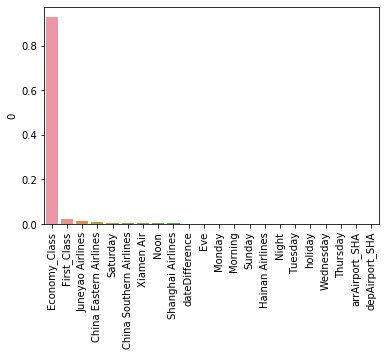

In [287]:
sns.barplot(x=gdb_features.index,y=gdb_features[0]);
plt.xticks(rotation=90);

In [288]:
# instantaite adaboost model
Pada = AdaBoostRegressor()

# fit the model to the train data
Pada.fit(X2P_train,y2P_train)

# get the prediction
Pada_preds = Pada.predict(X2P_val)
# get the MSE
Pmse_ada = mean_squared_error(y2P_val, Pada_preds)
Prmse_ada = np.sqrt(mean_squared_error(y2P_val, Pada_preds))

#print the mse
print(f'The Mean squared error for the ada boost model is {Pmse_ada}')
print(f'The Root Mean squared error for the ada boost model is {Prmse_ada}')
print(f'The R^2 value is : {r2_score(y2P_val,Pada_preds)}')

The Mean squared error for the ada boost model is 19358.32779749347
The Root Mean squared error for the ada boost model is 139.1342078623854
The R^2 value is : 0.7134641253432155


In [289]:
# instantiate the model
Prfr = RandomForestRegressor()

# fit the model to training data
Prfr.fit(X2P_train, y2P_train)

# Get predictions
Prfr_preds = Prfr.predict(X2P_val)

# get MSE and RMSE for model
Pmse_rfr = mean_squared_error(y2P_val, Prfr_preds)
Prmse_rfr = np.sqrt(mean_squared_error(y2P_val, Prfr_preds))
# print Mse
print(f'The mean squared error for Random Forest Validation Data is: {Pmse_rfr} ')
print(f'The Root mean squared error for Random Forest Validation Data is: {Prmse_rfr} ')
print(f'The R^2 value is : {r2_score(y2P_val,Prfr_preds)}')

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The mean squared error for Random Forest Validation Data is: 17965.165821963958 
The Root mean squared error for Random Forest Validation Data is: 134.0341964647976 
The R^2 value is : 0.7340852703807847


In [290]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# AdaBoost HyperParameter tuning

In [ ]:
%%time
#adat = AdaBoostRegressor(random_state=1,
#                          n_estimators = 500,
 #                         learning_rate = .1
  #                      )
#fit the model

#adat.fit(X2S_train, y2S_train)


In [ ]:
#adat_preds = adat.predict(X2S_val)

In [ ]:
#adat_preds.shape

In [ ]:
# adat_mse = mean_squared_error(y2S_val,adat_preds)
# adat_rmse = np.sqrt(adat_mse)
# adat_rmse

In [301]:
no_out_df.columns

Index(['Economy_Class', 'First_Class', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'China Eastern Airlines',
       'China Southern Airlines', 'Hainan Airlines', 'Juneyao Airlines',
       'Shanghai Airlines', 'Xiamen Air', 'Eve', 'Morning', 'Night', 'Noon',
       'flightNumber', 'cabinClass', 'price', 'rate', 'dateDifference',
       'departureDate_dofweek', 'arrivalDate_dofweek', 'createDate_dofweek',
       'pricePaid', 'arrAirport_SHA', 'depAirport_SHA', 'holiday',
       'exc_rateC-U', 'departureDate_hod'],
      dtype='object')

# No first class or economy feature

In [330]:
 # make variables 
X2U = no_out_df.drop(['price','exc_rateC-U','pricePaid','rate','cabinClass',
                'departureDate_hod','departureDate_dofweek','flightNumber',
                'arrivalDate_dofweek','createDate_dofweek',
                     'Economy_Class', 'First_Class'],axis=1)
y2U = no_out_df['price']

In [331]:
# do train test split
X2U_train,X2U_test,y2U_train,y2U_test = train_test_split(X2U,y2U, test_size=.2,random_state=1)

In [332]:
# make validation set
X2U_train,X2U_val, y2U_train,y2U_val = train_test_split(X2U_train,y2U_train,test_size=.2,random_state=1)

# Linear Regression UpSample

In [333]:
# instantiate the model
Ulinreg = LinearRegression()
# fit the model to the train data
Ulinreg.fit(X2U_train,y2U_train)

# get the prediction
Uy_preds = Ulinreg.predict(X2U_val)

# calculate the mse and rmse
Umse_linreg = mean_squared_error(y2U_val, Uy_preds)
Urmse_linreg = np.sqrt(mean_squared_error(y2U_val, Uy_preds))

print(f'the mean squared error for Linear Regression Vanilla is: {Umse_linreg}'.title())
print(f'the Root Mean Squared Error is : {Urmse_linreg}')
print(f'The R^2 value is : {r2_score(y2U_val,Uy_preds)}')

The Mean Squared Error For Linear Regression Vanilla Is: 62329.714299016705
the Root Mean Squared Error is : 249.6591963037146
The R^2 value is : 0.06668335518692325


In [334]:
X2U_train.shape

(364106, 20)

# XG Boost UpSample

In [335]:
# instantiate the model
Uxgb = xgboost.XGBRegressor()
# fit the model to training data
Uxgb.fit(X2U_train,y2U_train)
# get predictions
Uxgb_y_preds = Uxgb.predict(X2U_val)
# get mse and rmse
Umse_xgb = mean_squared_error(y2U_val,Uxgb_y_preds)
Urmse_xgb = np.sqrt(mean_squared_error(y2U_val,Uxgb_y_preds))
print(f'the Mean Squared Error is : {Umse_xgb}')
print(f'the Root Mean Squared Error is : {Urmse_xgb}')
print(f'The R^2 value is : {r2_score(y2U_val,Uxgb_y_preds)}')

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:20:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the Mean Squared Error is : 61892.94089276182
the Root Mean Squared Error is : 248.78291921424554
The R^2 value is : 0.07322354062903447


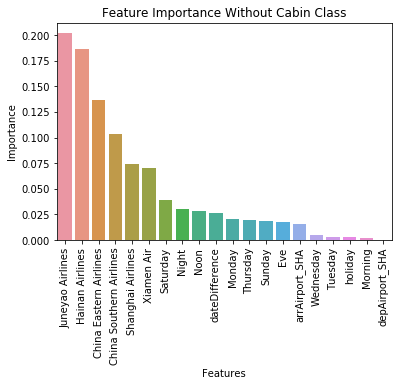

In [336]:
# check feature importance
xg_feats = pd.DataFrame(Uxgb.feature_importances_, index=X2U_train.columns).sort_values(by=0,ascending=False)
sns.barplot(x=xg_feats.index,y=xg_feats[0])
plt.xticks(rotation=90);
plt.title("Feature Importance Without Cabin Class");
plt.xlabel('Features');
plt.ylabel('Importance');

In [349]:
df.columns

Index(['Economy_Class', 'First_Class', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'China Eastern Airlines',
       'China Southern Airlines', 'Hainan Airlines', 'Juneyao Airlines',
       'Shanghai Airlines', 'Xiamen Air', 'Eve', 'Morning', 'Night', 'Noon',
       'ID', 'flightNumber', 'craftTypeCode', 'departureDate', 'arrivalDate',
       'cabinClass', 'priceClass', 'price', 'rate', 'createDate',
       'dateDifference', 'departureDate_dofweek', 'arrivalDate_dofweek',
       'createDate_dofweek', 'pricePaid', 'airline', 'arrAirport_SHA',
       'depAirport_SHA', 'holiday', 'just_departureDate', 'exc_rateC-U',
       'departureDate_tod', 'departureDate_hod', 'departureDate_pod',
       'cabinClass_type'],
      dtype='object')

In [355]:
econ = df[df['cabinClass']==0]
busi = df[df['cabinClass']==1]
first = df[df['cabinClass']==2]

In [360]:
econ.head()

,Economy_Class,First_Class,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,China Eastern Airlines,China Southern Airlines,...,airline,arrAirport_SHA,depAirport_SHA,holiday,just_departureDate,exc_rateC-U,departureDate_tod,departureDate_hod,departureDate_pod,cabinClass_type
162,1,0,0,0,0,0,0,0,0,0,...,Juneyao Airlines,1,0,1,2019-01-04,0.145669,06:35:00,6,Early Morning,Economy_Class
163,1,0,0,0,0,0,0,0,0,0,...,Juneyao Airlines,1,0,1,2019-01-04,0.145669,06:35:00,6,Early Morning,Economy_Class
164,1,0,0,0,0,0,0,0,0,0,...,Juneyao Airlines,1,0,1,2019-01-04,0.145669,06:35:00,6,Early Morning,Economy_Class
165,1,0,0,0,0,0,0,0,0,0,...,Juneyao Airlines,1,0,1,2019-01-04,0.145669,06:35:00,6,Early Morning,Economy_Class
166,1,0,0,0,0,0,0,0,0,0,...,Juneyao Airlines,1,0,1,2019-01-04,0.145669,06:35:00,6,Early Morning,Economy_Class


In [361]:
print(f'The avg ticket cost for economy class is {np.mean(econ['price'])}') 
print(f'The avg ticket cost for business class is {np.mean(busi['price'])}')
#print(f'The avg ticket cost for 1st class is {first['price'].mean()}')

SyntaxError: invalid syntax (<ipython-input-361-54fe650e0cde>, line 1)

# gradient Boosting

In [337]:
# instantiate the model
Ugdb = GradientBoostingRegressor()
# fit the model to training data
Ugdb.fit(X2U_train,y2U_train)

# get predictions
Ugdb_preds = Ugdb.predict(X2U_val)

#get MeanSE
Umse_gdb = mean_squared_error(Ugdb_preds,y2U_val)
Urmse_gdb = np.sqrt(mean_squared_error(Ugdb_preds,y2U_val))

print(f'the mean squared error for gradient boosting test data is {Umse_gdb}')
print(f'the root mean squared error is:{Urmse_gdb}')
print(f'The R^2 value is : {r2_score(y2U_val,Ugdb_preds)}')

the mean squared error for gradient boosting test data is 61892.146615223835
the root mean squared error is:248.7813228826148
The R^2 value is : 0.07323543403260846


In [338]:
pd.DataFrame(Ugdb.feature_importances_, index=X2U_train.columns)

,0
Monday,0.019891
Saturday,0.065727
Sunday,0.014412
Thursday,0.002898
Tuesday,0.003146
Wednesday,0.000728
China Eastern Airlines,0.199945
China Southern Airlines,0.074707
Hainan Airlines,0.179607
Juneyao Airlines,0.152842


# AdaBoosting

In [339]:
# instantaite adaboost model
Uada = AdaBoostRegressor()

# fit the model to the train data
Uada.fit(X2U_train,y2U_train)

# get the prediction
Uada_preds = Uada.predict(X2U_val)
# get the MSE
Umse_ada = mean_squared_error(y2U_val, Uada_preds)
Urmse_ada = np.sqrt(mean_squared_error(y2U_val, Uada_preds))

#print the mse
print(f'The Mean squared error for the ada boost model is {Umse_ada}')
print(f'The Root Mean squared error for the ada boost model is {Urmse_ada}')
print(f'The R^2 value is : {r2_score(y2U_val,Uada_preds)}')

The Mean squared error for the ada boost model is 66180.83567886094
The Root Mean squared error for the ada boost model is 257.2563617850119
The R^2 value is : 0.009017188649387498


In [340]:
pd.DataFrame(Uada.feature_importances_, index=X2U_train.columns)

,0
Monday,0.000000
Saturday,0.055967
Sunday,0.000022
Thursday,0.000000
Tuesday,0.000141
Wednesday,0.000000
China Eastern Airlines,0.196851
China Southern Airlines,0.131731
Hainan Airlines,0.181317
Juneyao Airlines,0.362988


In [341]:
# instantiate the model
Urfr = RandomForestRegressor()

# fit the model to training data
Urfr.fit(X2U_train, y2U_train)

# Get predictions
Urfr_preds = Urfr.predict(X2U_val)

# get MSE and RMSE for model
Umse_rfr = mean_squared_error(y2U_val, Urfr_preds)
Urmse_rfr = np.sqrt(mean_squared_error(y2U_val, Urfr_preds))
# print Mse
print(f'The mean squared error for Random Forest Validation Data is: {Umse_rfr} ')
print(f'The Root mean squared error for Random Forest Validation Data is: {Urmse_rfr} ')
print(f'The R^2 value is : {r2_score(y2U_val,Urfr_preds)}')

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The mean squared error for Random Forest Validation Data is: 61797.54230022787 
The Root mean squared error for Random Forest Validation Data is: 248.59111468479293 
The R^2 value is : 0.0746520261484217


In [342]:
pd.DataFrame(Urfr.feature_importances_, index=X2U_train.columns)

,0
Monday,0.025619
Saturday,0.057906
Sunday,0.023943
Thursday,0.016012
Tuesday,0.019443
Wednesday,0.016627
China Eastern Airlines,0.076949
China Southern Airlines,0.078520
Hainan Airlines,0.134411
Juneyao Airlines,0.102154


# More EDA

In [ ]:
# Methodology slide needs more work
# There is a lack of EDA.  Let us know how prices change based on price class, day of the week, time of day.
# Also show us a rundown of all the features you use.
#This will help you give more insights from the data.
#More intro, look at distributions, tighten up your language around R^2 (variance explained), 
#talk about the feature importance other than just airlines


In [379]:
# Look at the distirbutions of price across different classes

In [380]:
no_out_df.head()

,Economy_Class,First_Class,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,China Eastern Airlines,China Southern Airlines,...,dateDifference,departureDate_dofweek,arrivalDate_dofweek,createDate_dofweek,pricePaid,arrAirport_SHA,depAirport_SHA,holiday,exc_rateC-U,departureDate_hod
0,0,0,0,0,0,0,0,0,0,0,...,1,4,4,3,270.943495,1,0,1,0.145669,6
1,0,0,0,0,0,0,0,0,1,0,...,1,4,4,3,74.057889,1,0,1,0.145669,7
2,0,0,0,0,0,0,0,0,1,0,...,1,4,4,3,780.783405,1,0,1,0.145669,7
3,0,0,0,0,0,0,0,0,0,0,...,1,4,4,3,69.068741,1,0,1,0.145669,7
4,0,0,0,0,0,0,0,0,0,0,...,1,4,4,3,69.279960,1,0,1,0.145669,7


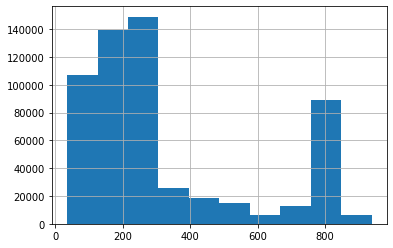

In [381]:
# Look at histogram of the price of the whole dataset

no_out_df['price'].hist()

In [382]:
econ_class = no_out_df[no_out_df['cabinClass']==0]
busi_class = no_out_df[no_out_df['cabinClass']==1]
first_class = no_out_df[no_out_df['cabinClass']==2] 

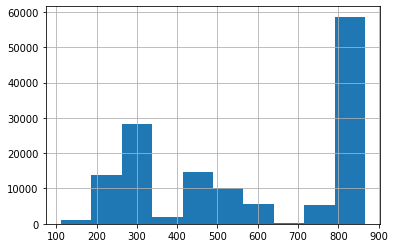

In [385]:
busi_class.price.hist()

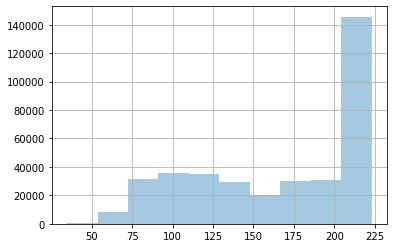

In [402]:
econ_class.price.hist(alpha=.4)

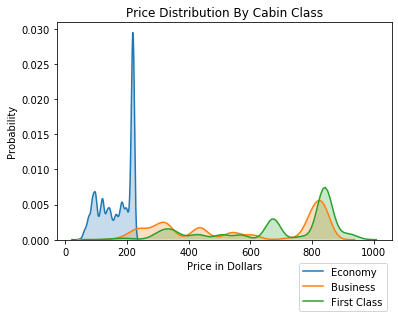

In [423]:
sns.kdeplot(econ_class.price, shade=True, label='Economy' );
sns.kdeplot(busi_class.price, shade=True, label = 'Business' );
sns.kdeplot(first_class.price, shade=True, label = 'First Class' );
plt.legend(loc='lower right', bbox_to_anchor=[1,-.35]);
plt.title('Price Distribution By Cabin Class');
plt.xlabel('Price in Dollars');
plt.ylabel('Probability');

In [428]:
econ_class.price.mean()

167.2552006789973

In [424]:
busi_class.price.mean()

577.3104680826634

In [426]:
first_class.price.mean()

688.0219574208126

Text(0, 0.5, 'Number of Tickets Sold')

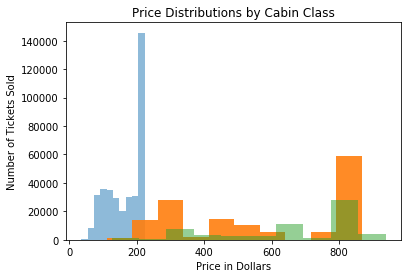

In [436]:
plt.hist(econ_class.price,alpha=0.5)
plt.hist(busi_class.price,alpha=0.9)
plt.hist(first_class.price,alpha=0.5)
plt.title('Price Distributions by Cabin Class')
plt.xlabel('Price in Dollars')
plt.ylabel('Number of Tickets Sold')


In [439]:
cece = df.groupby('cabinClass').agg({'price':'mean'}).reset_index()

In [440]:
cabin_key

{0: 'Economy_Class', 1: 'Bussiness_Class', 2: 'First_Class'}

In [441]:
cece['cabinClass'] = [cabin_key[i] for i in cece.cabinClass]

In [442]:
cece

,cabinClass,price
0,Economy_Class,167.255201
1,Bussiness_Class,577.310468
2,First_Class,688.021957


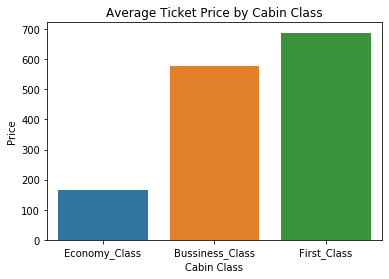

In [450]:
sns.barplot(x=cece['cabinClass'],y=cece['price']);
plt.ylabel('Price');
plt.xlabel('Cabin Class')
plt.title('Average Ticket Price by Cabin Class');

In [455]:
dede = df.groupby(['cabinClass','departureDate_dofweek']).agg({'price':'mean'}).reset_index()

In [454]:
weekdays_dict

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [457]:
dede['departureDate_dofweek'] = [weekdays_dict[i] for i in dede.departureDate_dofweek]

In [458]:
dede.head()

,cabinClass,departureDate_dofweek,price
0,0,Monday,156.333617
1,0,Tuesday,169.557875
2,0,Wednesday,179.243534
3,0,Thursday,181.057136
4,0,Friday,181.520052


In [484]:
cabin_key

{0: 'Economy_Class', 1: 'Bussiness_Class', 2: 'First_Class'}

In [486]:
dede['cabinClass'] = [cabin_key[i] for i in dede.cabinClass]

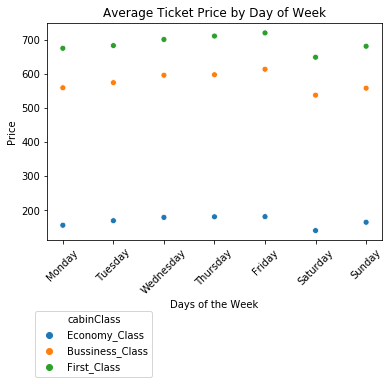

In [494]:
sns.scatterplot(x=dede['departureDate_dofweek'],y=dede['price'], hue=dede['cabinClass']);
plt.legend(bbox_to_anchor=[-.05,-.65],loc='lower left');
plt.xticks(rotation=45);
plt.xlabel('Days of the Week');
plt.ylabel('Price');
plt.title('Average Ticket Price by Day of Week');